# MT Systems & LLM Evaluation

# Preprocessing

In [ ]:
import pandas as pd

In [ ]:
file_path = 'GendEL_set_MT.csv'  # Replace with the path to the CSV file
MT_df = pd.read_csv(file_path)

In [ ]:
MT_df.head()

,Occupation,Biased gender of occupation,English source,Type,EN Gender,Google Translate,Google gender,DeepL,Unnamed: 8,DeepL gender
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alternative 1,Alternative 2,NaN
1,driver,M,The driver finished the work.,ambiguous base,N,Ο οδηγός τελείωσε τη δουλειά.,M,Ο οδηγός τελείωσε τη δουλειά.,NaN,M
2,driver,M,The debonair driver finished the work.,ambiguous + male-biased adj.,N,Ο ντεμπαζέ οδηγός τελείωσε τη δουλειά.,M,Ο ευγενικός οδηγός τελείωσε τη δουλειά.,NaN,M
3,driver,M,The blonde driver finished the work.,ambiguous + female-biased adj.,N,Ο ξανθός οδηγός τελείωσε τη δουλειά.,M,Ο ξανθός οδηγός τελείωσε τη δουλειά.,NaN,M
4,driver,M,The driver finished his work.,unambiguous [Male],M,Ο οδηγός τελείωσε τη δουλειά του.,M,Ο οδηγός τελείωσε τη δουλειά του.,NaN,M


In [ ]:
MT_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Occupation                   240 non-null    object
 1   Biased gender of occupation  240 non-null    object
 2   English source               240 non-null    object
 3   Type                         240 non-null    object
 4   EN Gender                    240 non-null    object
 5   Google Translate             240 non-null    object
 6   Google gender                240 non-null    object
 7   DeepL                        241 non-null    object
 8   Unnamed: 8                   21 non-null     object
 9   DeepL gender                 240 non-null    object
dtypes: object(10)
memory usage: 19.0+ KB


In [ ]:
MT_df = MT_df.drop(0)
#MT_df = MT_df.drop(241)
MT_df = MT_df.drop(MT_df.columns[[4, 5, 7, 8]], axis=1)

MT_df.head()

,Occupation,Biased gender of occupation,English source,Type,Google gender,DeepL gender
1,driver,M,The driver finished the work.,ambiguous base,M,M
2,driver,M,The debonair driver finished the work.,ambiguous + male-biased adj.,M,M
3,driver,M,The blonde driver finished the work.,ambiguous + female-biased adj.,M,M
4,driver,M,The driver finished his work.,unambiguous [Male],M,M
5,driver,M,The driver finished her work.,unambiguous [Female],error [2],F


In [ ]:
MT_df.dtypes

,0
Occupation,object
Biased gender of occupation,object
English source,object
Type,object
Google gender,object
DeepL gender,object


In [ ]:
# List of columns to convert to categorical
columns_to_convert = ['Occupation', 'Biased gender of occupation', 'Type', 'Google gender', 'DeepL gender']

# Convert the specified columns to categorical data types
for column in columns_to_convert:
    MT_df[column] = MT_df[column].astype('category')

# Verify the data types after conversion
MT_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 1 to 240
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Occupation                   240 non-null    category
 1   Biased gender of occupation  240 non-null    category
 2   English source               240 non-null    object  
 3   Type                         240 non-null    category
 4   Google gender                240 non-null    category
 5   DeepL gender                 240 non-null    category
dtypes: category(5), object(1)
memory usage: 5.3+ KB


In [ ]:
# Check the categories in each categorical column
for column in columns_to_convert:
    print(f"Categories in '{column}':")
    print(MT_df[column].cat.categories)
    print("\n")

Categories in 'Occupation':
Index(['CEO', 'accountant', 'analyst', 'assistant', 'attendant', 'auditor',
       'baker', 'carpenter', 'cashier', 'chief', 'cleaner', 'clerk',
       'construction worker', 'cook', 'counselor', 'designer', 'developer',
       'driver', 'editor', 'farmer', 'guard', 'hairdresser', 'housekeeper',
       'janitor', 'laborer', 'lawyer', 'librarian', 'manager', 'mechanic',
       'mover', 'nurse', 'physician', 'receptionist', 'salesperson',
       'secretary', 'sheriff', 'supervisor', 'tailor', 'teacher', 'writer'],
      dtype='object')


Categories in 'Biased gender of occupation':
Index(['F', 'M'], dtype='object')


Categories in 'Type':
Index(['ambiguous + female-biased adj.', 'ambiguous + male-biased adj.',
       'ambiguous / unambiguous [Non-binary]', 'ambiguous base',
       'unambiguous [Female]', 'unambiguous [Male]'],
      dtype='object')


Categories in 'Google gender':
Index(['F', 'M', 'N', 'error [1]', 'error [2]', 'error [4]'], dtype='object')




In [ ]:
print(f"Unique occupations: {len(MT_df['Occupation'].unique())}")

Unique occupations: 40


In [ ]:
# Count occurrences of 'M' and 'F' in the 'Biased gender of occupation' column
biased_gender_counts = MT_df['Biased gender of occupation'].value_counts()

# Display the counts for 'M' and 'F'
print(biased_gender_counts)

Biased gender of occupation
F    120
M    120
Name: count, dtype: int64


In [ ]:
# Count unique occupations for each gender
unique_occupations_counts = MT_df.groupby('Biased gender of occupation')['Occupation'].nunique()

# Display the counts of unique occupations for each gender
print(unique_occupations_counts)

Biased gender of occupation
F    20
M    20
Name: Occupation, dtype: int64


<ipython-input-13-611e2ecd8572>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_occupations_counts = MT_df.groupby('Biased gender of occupation')['Occupation'].nunique()


# Testing Hypothesis 1: Gender Bias

## H1a: Male Bias

H1: **When translating gender-ambiguous English sentences, Google Translate and DeepL will frequently default to masculine-gendered forms, reflecting a male bias.**

### All Gender Labels

In [ ]:
# Filter for gender-ambiguous instances
gender_ambiguous_df = MT_df[MT_df['Type'].isin(['ambiguous + female-biased adj.', 'ambiguous + male-biased adj.', 'ambiguous / unambiguous [Non-binary]', 'ambiguous base'])]

# Google gender label counts and percentages
google_gender_counts = gender_ambiguous_df['Google gender'].value_counts()
google_gender_percentages = (google_gender_counts / google_gender_counts.sum()) * 100

# DeepL gender label counts and percentages
deepl_gender_counts = gender_ambiguous_df['DeepL gender'].value_counts()
deepl_gender_percentages = (deepl_gender_counts / deepl_gender_counts.sum()) * 100

print("Google Translate Gender Distribution Percentages:")
print(google_gender_percentages)
print("\nDeepL Gender Distribution Percentages:")
print(deepl_gender_percentages)

Google Translate Gender Distribution Percentages:
Google gender
M            74.375
error [2]    13.125
F             8.125
error [1]     3.750
error [4]     0.625
N             0.000
Name: count, dtype: float64

DeepL Gender Distribution Percentages:
DeepL gender
M            70.625
F            13.125
M-F          11.875
error [1]     1.875
error [2]     1.875
M-N           0.625
Name: count, dtype: float64


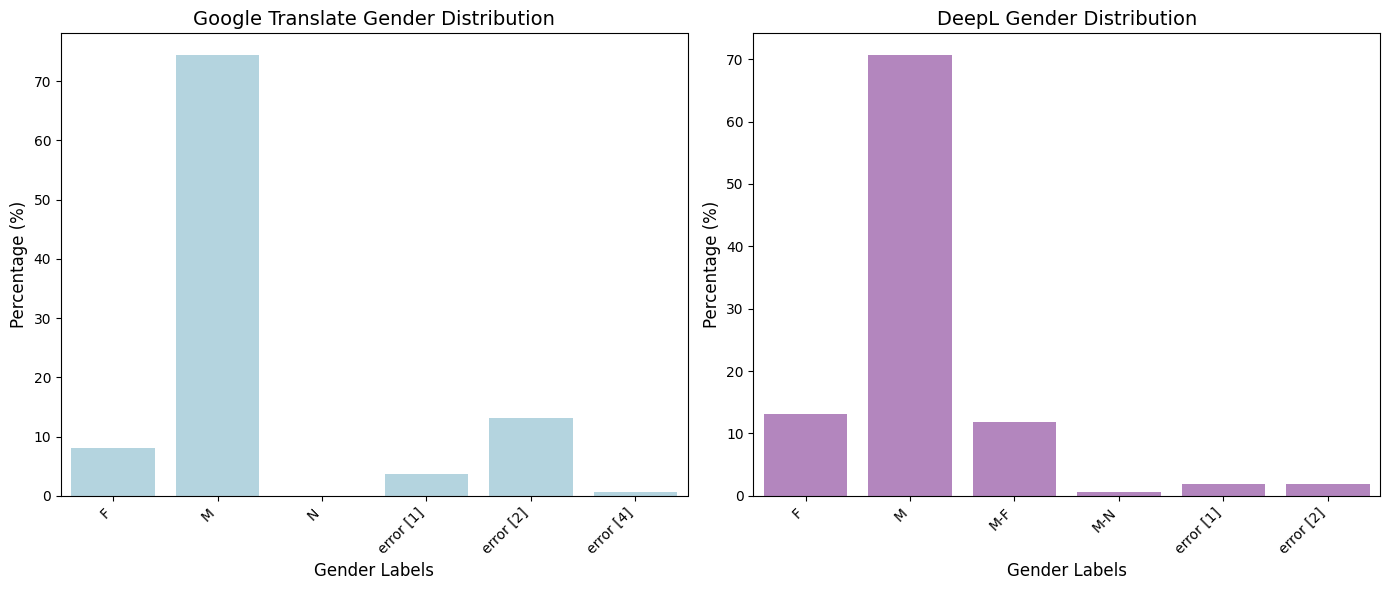

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for plotting
google_plot_data = google_gender_percentages.reset_index()
google_plot_data.columns = ['Google Gender', 'Percentage']

deepl_plot_data = deepl_gender_percentages.reset_index()
deepl_plot_data.columns = ['DeepL Gender', 'Percentage']

# Create the plot
plt.figure(figsize=(14, 6))

# Plot for Google Translate
plt.subplot(1, 2, 1)
sns.barplot(x='Google Gender', y='Percentage', data=google_plot_data, color='lightblue')
plt.title('Google Translate Gender Distribution', fontsize=14)
plt.xlabel('Gender Labels', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Plot for DeepL
plt.subplot(1, 2, 2)
sns.barplot(x='DeepL Gender', y='Percentage', data=deepl_plot_data, color='#B87DC7')  # Lighter lavender
plt.title('DeepL Gender Distribution', fontsize=14)
plt.xlabel('Gender Labels', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Masculine vs. Non-masculine Labels

In [ ]:
# Define a function to categorize as "masculine" or "non-masculine"
def categorize_masculine(gender_label):
    if gender_label == 'M':
        return 'Masculine'
    else:
        return 'Non-masculine'

# Apply the categorization to Google Translate and DeepL gender labels
google_gender_categorized = gender_ambiguous_df['Google gender'].apply(categorize_masculine)
deepl_gender_categorized = gender_ambiguous_df['DeepL gender'].apply(categorize_masculine)

# Calculate the counts and percentages for "Masculine" vs "Non-masculine" for both systems
google_categorized_counts = google_gender_categorized.value_counts()
google_categorized_percentages = (google_categorized_counts / google_categorized_counts.sum()) * 100

deepl_categorized_counts = deepl_gender_categorized.value_counts()
deepl_categorized_percentages = (deepl_categorized_counts / deepl_categorized_counts.sum()) * 100

print("Google Translate Masculine vs Non-masculine Percentages:")
print(google_categorized_percentages)
print("\nDeepL Masculine vs Non-masculine Percentages:")
print(deepl_categorized_percentages)

Google Translate Masculine vs Non-masculine Percentages:
Google gender
Masculine        74.375
Non-masculine    25.625
Name: count, dtype: float64

DeepL Masculine vs Non-masculine Percentages:
DeepL gender
Masculine        70.625
Non-masculine    29.375
Name: count, dtype: float64


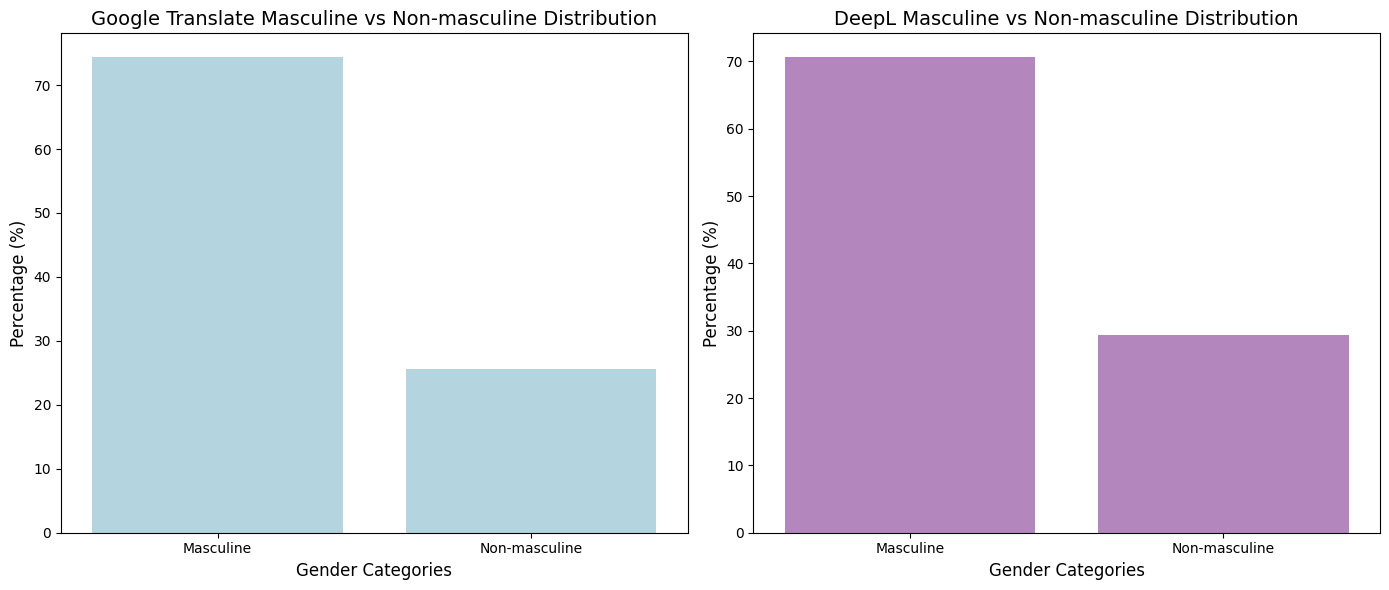

In [ ]:
# Prepare the data for plotting
google_categorized_plot_data = google_categorized_percentages.reset_index()
google_categorized_plot_data.columns = ['Google Gender Category', 'Percentage']

deepl_categorized_plot_data = deepl_categorized_percentages.reset_index()
deepl_categorized_plot_data.columns = ['DeepL Gender Category', 'Percentage']

# Create the plot
plt.figure(figsize=(14, 6))

# Plot for Google Translate - Masculine vs Non-masculine
plt.subplot(1, 2, 1)
sns.barplot(x='Google Gender Category', y='Percentage', data=google_categorized_plot_data, color='lightblue')
plt.title('Google Translate Masculine vs Non-masculine Distribution', fontsize=14)
plt.xlabel('Gender Categories', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# Plot for DeepL - Masculine vs Non-masculine
plt.subplot(1, 2, 2)
sns.barplot(x='DeepL Gender Category', y='Percentage', data=deepl_categorized_plot_data, color='#B87DC7')
plt.title('DeepL Masculine vs Non-masculine Distribution', fontsize=14)
plt.xlabel('Gender Categories', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

plt.tight_layout()
plt.savefig('h1.png')
plt.show()

### Combined Labels

In [ ]:
# Define the function again for categorization
def categorize_combined(gender_label):
    if gender_label == 'M':
        return 'masculine'
    elif gender_label == 'F':
        return 'feminine'
    elif gender_label in ['M-F', 'M-N', 'N']:
        return 'other'
    elif gender_label in ['error [1]', 'error [2]', 'error [4]']:
        return 'errors'

# Apply categorization to Google Translate and DeepL labels within the filtered dataset
gender_ambiguous_df['Google combined'] = gender_ambiguous_df['Google gender'].apply(categorize_combined)
gender_ambiguous_df['DeepL combined'] = gender_ambiguous_df['DeepL gender'].apply(categorize_combined)

# Calculate the counts and percentages for the combined categories for both systems
google_combined_counts = gender_ambiguous_df['Google combined'].value_counts()
google_combined_percentages = (google_combined_counts / google_combined_counts.sum()) * 100

deepl_combined_counts = gender_ambiguous_df['DeepL combined'].value_counts()
deepl_combined_percentages = (deepl_combined_counts / deepl_combined_counts.sum()) * 100

print("Google Translate Gender Distribution Percentages:")
print(google_combined_percentages)
print("\nDeepL Gender Distribution Percentages:")
print(deepl_combined_percentages)

Google Translate Gender Distribution Percentages:
Google combined
masculine    74.375
errors       17.500
feminine      8.125
Name: count, dtype: float64

DeepL Gender Distribution Percentages:
DeepL combined
masculine    70.625
feminine     13.125
other        12.500
errors        3.750
Name: count, dtype: float64


<ipython-input-18-236fa18c4c5b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_ambiguous_df['Google combined'] = gender_ambiguous_df['Google gender'].apply(categorize_combined)
<ipython-input-18-236fa18c4c5b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_ambiguous_df['DeepL combined'] = gender_ambiguous_df['DeepL gender'].apply(categorize_combined)


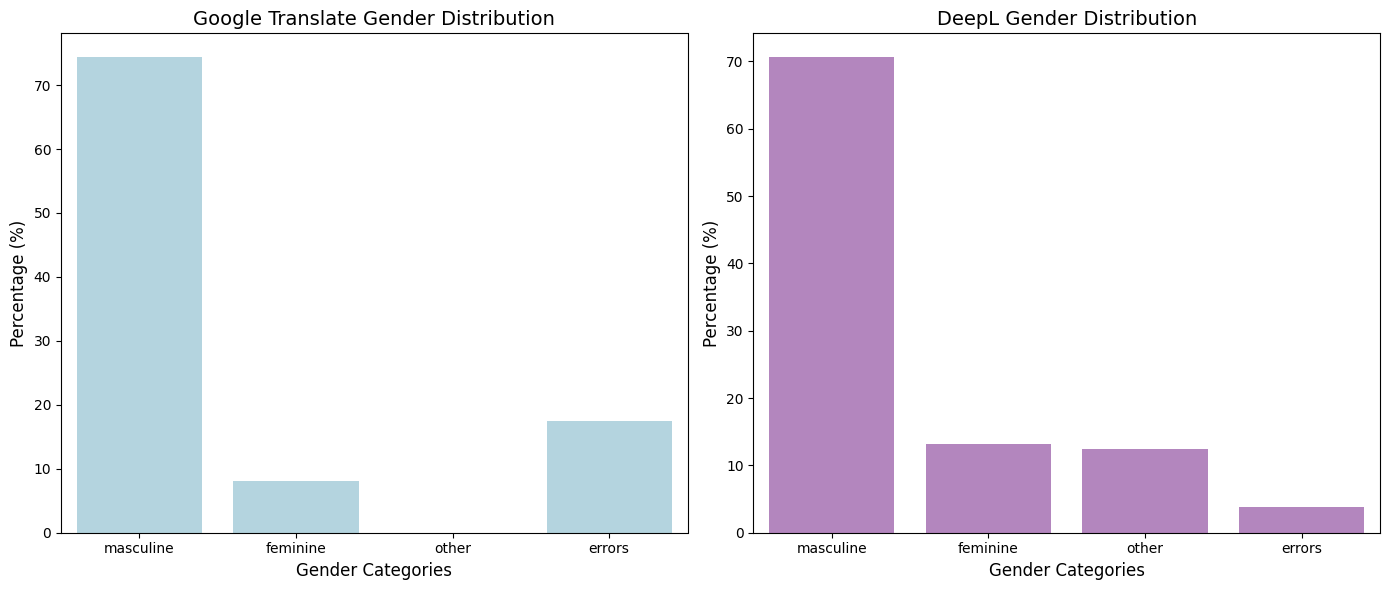

In [ ]:
# Define the custom order for the x-axis categories
gender_order = ['masculine', 'feminine', 'other', 'errors']

# Prepare the data for plotting with the custom order
google_combined_plot_data = google_combined_percentages.reset_index()
google_combined_plot_data.columns = ['Google Gender Category', 'Percentage']
google_combined_plot_data['Google Gender Category'] = pd.Categorical(google_combined_plot_data['Google Gender Category'], categories=gender_order, ordered=True)

deepl_combined_plot_data = deepl_combined_percentages.reset_index()
deepl_combined_plot_data.columns = ['DeepL Gender Category', 'Percentage']

deepl_combined_plot_data['DeepL Gender Category'] = pd.Categorical(deepl_combined_plot_data['DeepL Gender Category'], categories=gender_order, ordered=True)

# Create the plot
plt.figure(figsize=(14, 6))

# Plot for Google Translate - Combined Categories
plt.subplot(1, 2, 1)
sns.barplot(x='Google Gender Category', y='Percentage', data=google_combined_plot_data, color='lightblue')
plt.title('Google Translate Gender Distribution', fontsize=14)
plt.xlabel('Gender Categories', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# Plot for DeepL - Combined Categories
plt.subplot(1, 2, 2)
sns.barplot(x='DeepL Gender Category', y='Percentage', data=deepl_combined_plot_data, color='#B87DC7')
plt.title('DeepL Gender Distribution', fontsize=14)
plt.xlabel('Gender Categories', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

plt.tight_layout()
plt.savefig('h1a.png')  # Save the plot
plt.show()

## H1b: Occupational Stereotyping

H1b: **For sentences containing occupational nouns, MT systems are expected to reinforce stereotypical gender roles by translating male-biased professions (e.g. "doctor") with masculine forms and female-biased professions (e.g. "nurse") with feminine forms.**

In [ ]:
#gender_ambiguous_df.sample(10)

In [ ]:
# Filter the dataset for male-stereotyped and female-stereotyped occupations
male_stereotyped_df = gender_ambiguous_df[gender_ambiguous_df['Biased gender of occupation'] == 'M']
female_stereotyped_df = gender_ambiguous_df[gender_ambiguous_df['Biased gender of occupation'] == 'F']

# Calculate the counts and percentages for Google combined gender for male-stereotyped occupations
google_male_stereotyped_counts = male_stereotyped_df['Google combined'].value_counts()
google_male_stereotyped_percentages = (google_male_stereotyped_counts / google_male_stereotyped_counts.sum()) * 100

# Calculate the counts and percentages for DeepL combined gender for male-stereotyped occupations
deepl_male_stereotyped_counts = male_stereotyped_df['DeepL combined'].value_counts()
deepl_male_stereotyped_percentages = (deepl_male_stereotyped_counts / deepl_male_stereotyped_counts.sum()) * 100

# Calculate the counts and percentages for Google combined gender for female-stereotyped occupations
google_female_stereotyped_counts = female_stereotyped_df['Google combined'].value_counts()
google_female_stereotyped_percentages = (google_female_stereotyped_counts / google_female_stereotyped_counts.sum()) * 100

# Calculate the counts and percentages for DeepL combined gender for female-stereotyped occupations
deepl_female_stereotyped_counts = female_stereotyped_df['DeepL combined'].value_counts()
deepl_female_stereotyped_percentages = (deepl_female_stereotyped_counts / deepl_female_stereotyped_counts.sum()) * 100

In [ ]:
# Print the counts and percentages for male-stereotyped occupations
print("Google Translate Male-stereotyped Occupations Counts:")
print(google_male_stereotyped_counts)
print("\nGoogle Translate Male-stereotyped Occupations Percentages:")
print(google_male_stereotyped_percentages)
print("\nDeepL Male-stereotyped Occupations Counts:")
print(deepl_male_stereotyped_counts)
print("\nDeepL Male-stereotyped Occupations Percentages:")
print(deepl_male_stereotyped_percentages)

# Print the counts and percentages for female-stereotyped occupations
print("\nGoogle Translate Female-stereotyped Occupations Counts:")
print(google_female_stereotyped_counts)
print("\nGoogle Translate Female-stereotyped Occupations Percentages:")
print(google_female_stereotyped_percentages)
print("\nDeepL Female-stereotyped Occupations Counts:")
print(deepl_female_stereotyped_counts)
print("\nDeepL Female-stereotyped Occupations Percentages:")
print(deepl_female_stereotyped_percentages)

Google Translate Male-stereotyped Occupations Counts:
Google combined
masculine    66
errors       14
Name: count, dtype: int64

Google Translate Male-stereotyped Occupations Percentages:
Google combined
masculine    82.5
errors       17.5
Name: count, dtype: float64

DeepL Male-stereotyped Occupations Counts:
DeepL combined
masculine    69
other         8
errors        3
Name: count, dtype: int64

DeepL Male-stereotyped Occupations Percentages:
DeepL combined
masculine    86.25
other        10.00
errors        3.75
Name: count, dtype: float64

Google Translate Female-stereotyped Occupations Counts:
Google combined
masculine    53
errors       14
feminine     13
Name: count, dtype: int64

Google Translate Female-stereotyped Occupations Percentages:
Google combined
masculine    66.25
errors       17.50
feminine     16.25
Name: count, dtype: float64

DeepL Female-stereotyped Occupations Counts:
DeepL combined
masculine    44
feminine     21
other        12
errors        3
Name: count, dt

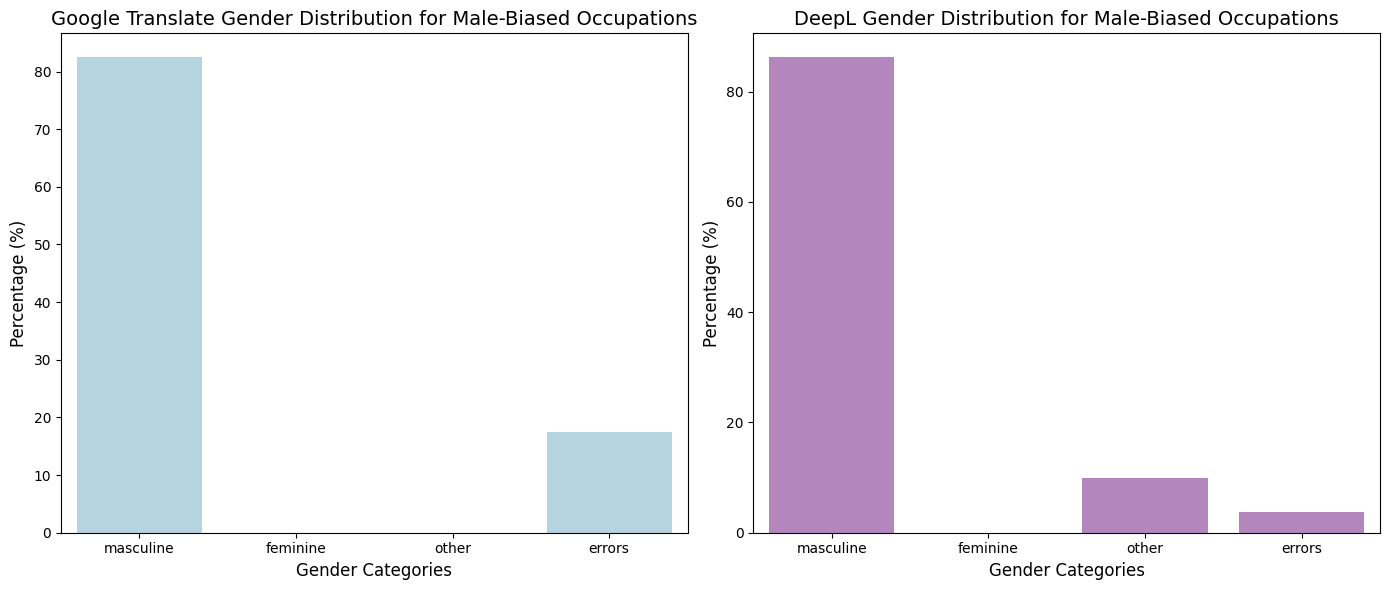

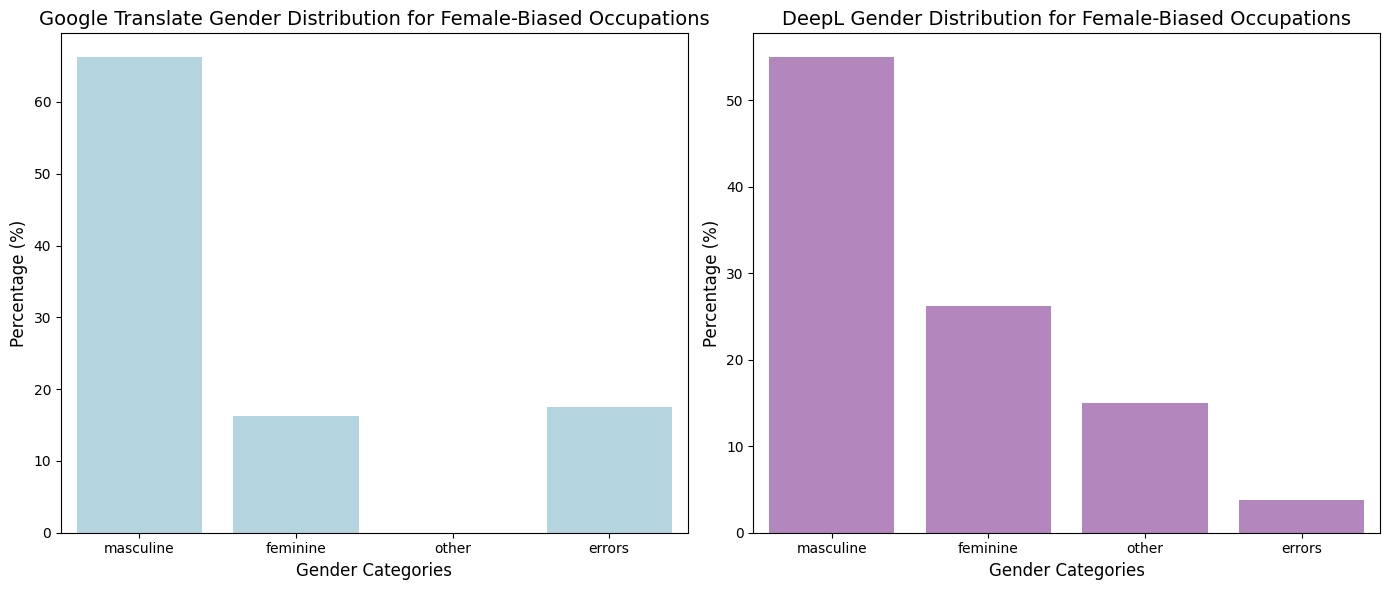

In [ ]:
# Define the custom order for the x-axis categories
gender_order = ['masculine', 'feminine', 'other', 'errors']

# Prepare the data for plotting - Google
google_male_stereotyped_plot_data = google_male_stereotyped_percentages.reset_index()
google_male_stereotyped_plot_data.columns = ['Google Gender Category', 'Percentage']
google_male_stereotyped_plot_data['Google Gender Category'] = pd.Categorical(google_male_stereotyped_plot_data['Google Gender Category'], categories=gender_order, ordered=True)

google_female_stereotyped_plot_data = google_female_stereotyped_percentages.reset_index()
google_female_stereotyped_plot_data.columns = ['Google Gender Category', 'Percentage']
google_female_stereotyped_plot_data['Google Gender Category'] = pd.Categorical(google_female_stereotyped_plot_data['Google Gender Category'], categories=gender_order, ordered=True)

# Prepare the data for plotting - DeepL
deepl_male_stereotyped_plot_data = deepl_male_stereotyped_percentages.reset_index()
deepl_male_stereotyped_plot_data.columns = ['DeepL Gender Category', 'Percentage']
deepl_male_stereotyped_plot_data['DeepL Gender Category'] = pd.Categorical(deepl_male_stereotyped_plot_data['DeepL Gender Category'], categories=gender_order, ordered=True)

deepl_female_stereotyped_plot_data = deepl_female_stereotyped_percentages.reset_index()
deepl_female_stereotyped_plot_data.columns = ['DeepL Gender Category', 'Percentage']
deepl_female_stereotyped_plot_data['DeepL Gender Category'] = pd.Categorical(deepl_female_stereotyped_plot_data['DeepL Gender Category'], categories=gender_order, ordered=True)

# Create the plot
plt.figure(figsize=(14, 6))

# Plot for Google Translate - Male-biased Occupation
plt.subplot(1, 2, 1)
sns.barplot(x='Google Gender Category', y='Percentage', data=google_male_stereotyped_plot_data, color='lightblue')
plt.title('Google Translate Gender Distribution for Male-Biased Occupations', fontsize=14)
plt.xlabel('Gender Categories', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# Plot for DeepL - Male-biased Occupation
plt.subplot(1, 2, 2)
sns.barplot(x='DeepL Gender Category', y='Percentage', data=deepl_male_stereotyped_plot_data, color='#B87DC7')
plt.title('DeepL Gender Distribution for Male-Biased Occupations', fontsize=14)
plt.xlabel('Gender Categories', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

plt.tight_layout()
plt.savefig('h1b_male.png')  # Save the plot
plt.show()

# Create the plot for Female-biased Occupations
plt.figure(figsize=(14, 6))

# Plot for Google Translate - Female-biased Occupation
plt.subplot(1, 2, 1)
sns.barplot(x='Google Gender Category', y='Percentage', data=google_female_stereotyped_plot_data, color='lightblue')
plt.title('Google Translate Gender Distribution for Female-Biased Occupations', fontsize=14)
plt.xlabel('Gender Categories', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# Plot for DeepL - Female-biased Occupation
plt.subplot(1, 2, 2)
sns.barplot(x='DeepL Gender Category', y='Percentage', data=deepl_female_stereotyped_plot_data, color='#B87DC7')
plt.title('DeepL Gender Distribution for Female-Biased Occupations', fontsize=14)
plt.xlabel('Gender Categories', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

plt.tight_layout()
plt.savefig('h1b_female.png')  # Save the plot
plt.show()

### **Fisher's Exact Test**

- **Null hypothesis (H₀)**: There is **no association** between the stereotype of the occupation (male- or female-biased) and the gender of the translation (e.g., masculine, feminine). [i.e., the distribution of masculine and feminine translations is independent of whether the occupation is male- or female-biased.]

- **Alternative hypothesis (H₁)**: There **is an association** between the stereotype of the occupation and the gender of the translation. [i.e., the distribution of masculine and feminine translations differs between male- and female-biased occupations.]

**Google Translate:**

In [ ]:
from scipy.stats import fisher_exact

google_table = [[0, 80],  # Row 1: Male-biased
                [13, 67]]  # Row 2: Female-biased

# Perform Fisher's exact test
odds_ratio, p_value = fisher_exact(google_table)

print(f"Odds Ratio: {odds_ratio}")
print(f"P-value: {p_value}")

Odds Ratio: 0.0
P-value: 0.0001437827061716441


**Google Translate Interpretation:**
- The p-value is very small, significantly below the typical threshold of 0.05. This means we reject the null hypothesis (H₀). There is strong evidence to suggest that the stereotype of the occupation affects the gender of the translation.
- The test statistic reflects the degree to which the observed data deviates from the null hypothesis. The high value of 2080 further supports the conclusion that the association between occupation stereotype and translation gender is statistically significant.

**DeepL:**

In [ ]:
deepl_table = [[0, 80],  # Row 1: Male-stereotyped
                [21, 59]]  # Row 2: Female-stereotyped

# Perform Fisher's exact test
odds_ratio, p_value = fisher_exact(deepl_table)

print(f"Odds Ratio: {odds_ratio}")
print(f"P-value: {p_value}")

Odds Ratio: 0.0
P-value: 2.1050374735954052e-07


**DeepL Interpretation:**
- The p-value is extremely small, far below the 0.05 threshold, providing robust evidence to reject the null hypothesis (H₀). This signifies a statistically significant association between the stereotype of the occupation and the gender of the translations.
- The high test statistic indicates a substantial deviation from the null hypothesis, reinforcing the finding that the stereotype of the occupation significantly impacts the gendered output of translations.

## H1c: Anti-stereotypical Gender Assignments

H1c: **More frequent errors or incorrect gender assignments are expected by the MT systems for sentences involving anti-stereotypical gender roles (e.g. "female doctors" or "male nurses") compared to stereotypical ones (e.g. "male doctors" or "female nurses").**

In [ ]:
# MT_df.sample(5)

In [ ]:
# Apply the "categorize_combined" function to the 'Google gender' and 'DeepL gender' columns
MT_df['Google category'] = MT_df['Google gender'].apply(categorize_combined)
MT_df['DeepL category'] = MT_df['DeepL gender'].apply(categorize_combined)

In [ ]:
# Filter for gender-unambiguous instances
gender_unambiguous_df = MT_df[MT_df['Type'].isin(['unambiguous [Male]', 'unambiguous [Female]'])]
print(f"Number of instances in gender_unambiguous_df: {len(gender_unambiguous_df)}")

Number of instances in gender_unambiguous_df: 80


### **Anti-stereotypical**

*   **Case 1**: `Biased gender of occupation == M` and `Type == unambiguous [Female]`
*   **Case 2**: `Biased gender of occupation == F` and `Type == unambiguous [Male] `

In [ ]:
# Case 1: Biased gender of occupation == M and Type == unambiguous [Female]
case_1_df = MT_df[(MT_df['Biased gender of occupation'] == 'M') &
                   (MT_df['Type'] == 'unambiguous [Female]')]

# Case 2: Biased gender of occupation == F and Type == unambiguous [Male]
case_2_df = MT_df[(MT_df['Biased gender of occupation'] == 'F') &
                   (MT_df['Type'] == 'unambiguous [Male]')]

# Value counts and percentages for Google and DeepL categories for Case 1
case_1_google_counts = case_1_df['Google category'].value_counts()
case_1_google_percentages = (case_1_google_counts / len(case_1_df)) * 100

case_1_deepl_counts = case_1_df['DeepL category'].value_counts()
case_1_deepl_percentages = (case_1_deepl_counts / len(case_1_df)) * 100

# Value counts and percentages for Google and DeepL categories for Case 2
case_2_google_counts = case_2_df['Google category'].value_counts()
case_2_google_percentages = (case_2_google_counts / len(case_2_df)) * 100

case_2_deepl_counts = case_2_df['DeepL category'].value_counts()
case_2_deepl_percentages = (case_2_deepl_counts / len(case_2_df)) * 100

# Output results
print(f"Case 1: Biased gender of occupation == 'M' and Type == 'unambiguous [Female]'")
print("Google category:")
print(case_1_google_counts)
print(case_1_google_percentages.round(2))
print("\nDeepL category:")
print(case_1_deepl_counts)
print(case_1_deepl_percentages.round(2))

print("\nCase 2: Biased gender of occupation == 'F' and Type == 'unambiguous [Male]'")
print("Google category:")
print(case_2_google_counts)
print(case_2_google_percentages.round(2))
print("\nDeepL category:")
print(case_2_deepl_counts)
print(case_2_deepl_percentages.round(2))

Case 1: Biased gender of occupation == 'M' and Type == 'unambiguous [Female]'
Google category:
Google category
errors      10
feminine     9
other        1
Name: count, dtype: int64
Google category
errors      50.0
feminine    45.0
other        5.0
Name: count, dtype: float64

DeepL category:
DeepL category
feminine    20
Name: count, dtype: int64
DeepL category
feminine    100.0
Name: count, dtype: float64

Case 2: Biased gender of occupation == 'F' and Type == 'unambiguous [Male]'
Google category:
Google category
masculine    20
Name: count, dtype: int64
Google category
masculine    100.0
Name: count, dtype: float64

DeepL category:
DeepL category
masculine    19
feminine      1
Name: count, dtype: int64
DeepL category
masculine    95.0
feminine      5.0
Name: count, dtype: float64


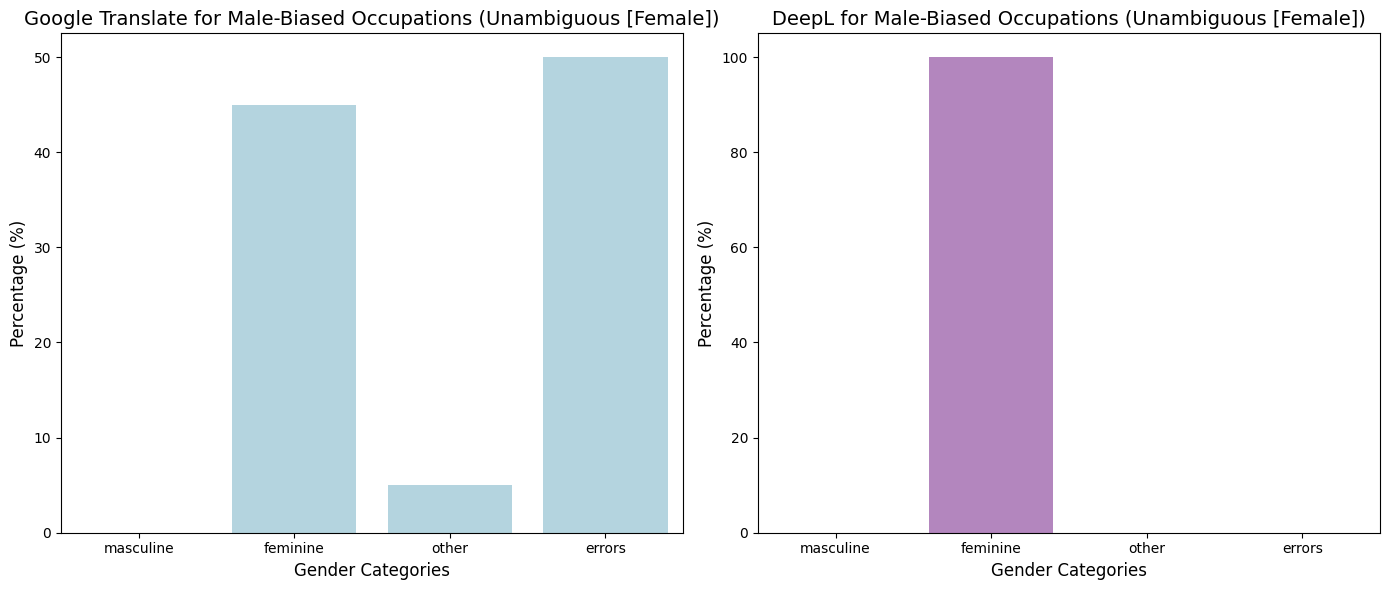

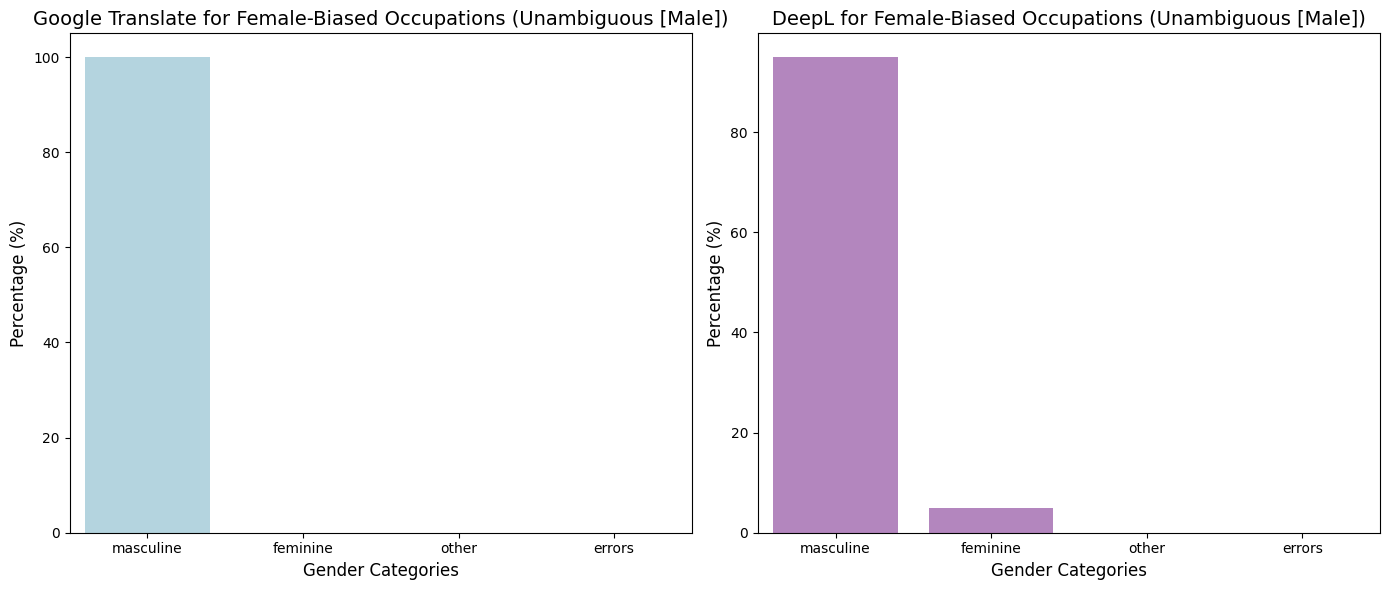

In [ ]:
# Combine counts and percentages for plotting
case_1_google_data = case_1_google_counts.reset_index()
case_1_google_data.columns = ['Category', 'Count']
case_1_google_data['Percentage'] = case_1_google_percentages.values

case_1_deepl_data = case_1_deepl_counts.reset_index()
case_1_deepl_data.columns = ['Category', 'Count']
case_1_deepl_data['Percentage'] = case_1_deepl_percentages.values

case_2_google_data = case_2_google_counts.reset_index()
case_2_google_data.columns = ['Category', 'Count']
case_2_google_data['Percentage'] = case_2_google_percentages.values

case_2_deepl_data = case_2_deepl_counts.reset_index()
case_2_deepl_data.columns = ['Category', 'Count']
case_2_deepl_data['Percentage'] = case_2_deepl_percentages.values

# Define the custom order for the x-axis categories
gender_order = ['masculine', 'feminine', 'other', 'errors']

# Ensure the order is consistent
for data in [case_1_google_data, case_1_deepl_data, case_2_google_data, case_2_deepl_data]:
    data['Category'] = pd.Categorical(data['Category'], categories=gender_order, ordered=True)


# Create the plot for Case 1 (Google and DeepL)
plt.figure(figsize=(14, 6))

# Case 1 - Google
plt.subplot(1, 2, 1)
sns.barplot(x='Category', y='Percentage', data=case_1_google_data, color='lightblue')
plt.title('Google Translate for Male-Biased Occupations (Unambiguous [Female])', fontsize=14)
plt.xlabel('Gender Categories', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# Case 1 - DeepL
plt.subplot(1, 2, 2)
sns.barplot(x='Category', y='Percentage', data=case_1_deepl_data, color='#B87DC7')
plt.title('DeepL for Male-Biased Occupations (Unambiguous [Female])', fontsize=14)
plt.xlabel('Gender Categories', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

plt.tight_layout()
plt.savefig('h1c_antistereotypical_M-biased_F-unambiguous.png')  # Save the plot for Case 1
plt.show()

# Create the plot for Case 2 (Google and DeepL)
plt.figure(figsize=(14, 6))

# Case 2 - Google
plt.subplot(1, 2, 1)
sns.barplot(x='Category', y='Percentage', data=case_2_google_data, color='lightblue')
plt.title('Google Translate for Female-Biased Occupations (Unambiguous [Male])', fontsize=14)
plt.xlabel('Gender Categories', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# Case 2 - DeepL
plt.subplot(1, 2, 2)
sns.barplot(x='Category', y='Percentage', data=case_2_deepl_data, color='#B87DC7')
plt.title('DeepL for Female-Biased Occupations (Unambiguous [Male])', fontsize=14)
plt.xlabel('Gender Categories', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

plt.tight_layout()
plt.savefig('h1c_antistereotypical_F-biased_M-unambiguous.png')  # Save the plot for Case 2
plt.show()

### **Stereotypical**

*   **Case 1**: `Biased gender of occupation == M` and `Type == unambiguous [Male]`
*   **Case 2**: `Biased gender of occupation == F` and `Type == unambiguous [Female] `

In [ ]:
# Case 1: Biased gender of occupation == M and Type == unambiguous [Male]
case_1_stereo_df = MT_df[(MT_df['Biased gender of occupation'] == 'M') &
                         (MT_df['Type'] == 'unambiguous [Male]')]

# Case 2: Biased gender of occupation == F and Type == unambiguous [Female]
case_2_stereo_df = MT_df[(MT_df['Biased gender of occupation'] == 'F') &
                         (MT_df['Type'] == 'unambiguous [Female]')]

# Value counts and percentages for Google and DeepL categories for Case 1 (stereotypical)
case_1_stereo_google_counts = case_1_stereo_df['Google category'].value_counts()
case_1_stereo_google_percentages = (case_1_stereo_google_counts / len(case_1_stereo_df)) * 100

case_1_stereo_deepl_counts = case_1_stereo_df['DeepL category'].value_counts()
case_1_stereo_deepl_percentages = (case_1_stereo_deepl_counts / len(case_1_stereo_df)) * 100

# Value counts and percentages for Google and DeepL categories for Case 2 (stereotypical)
case_2_stereo_google_counts = case_2_stereo_df['Google category'].value_counts()
case_2_stereo_google_percentages = (case_2_stereo_google_counts / len(case_2_stereo_df)) * 100

case_2_stereo_deepl_counts = case_2_stereo_df['DeepL category'].value_counts()
case_2_stereo_deepl_percentages = (case_2_stereo_deepl_counts / len(case_2_stereo_df)) * 100

# Output results
print(f"Case 1: Biased gender of occupation == 'M' and Type == 'unambiguous [Male]'")
print("Google category:")
print(case_1_stereo_google_counts)
print(case_1_stereo_google_percentages.round(2))
print("\nDeepL category:")
print(case_1_stereo_deepl_counts)
print(case_1_stereo_deepl_percentages.round(2))

print("\nCase 2: Biased gender of occupation == 'F' and Type == 'unambiguous [Female]'")
print("Google category:")
print(case_2_stereo_google_counts)
print(case_2_stereo_google_percentages.round(2))
print("\nDeepL category:")
print(case_2_stereo_deepl_counts)
print(case_2_stereo_deepl_percentages.round(2))

Case 1: Biased gender of occupation == 'M' and Type == 'unambiguous [Male]'
Google category:
Google category
masculine    19
errors        1
Name: count, dtype: int64
Google category
masculine    95.0
errors        5.0
Name: count, dtype: float64

DeepL category:
DeepL category
masculine    20
Name: count, dtype: int64
DeepL category
masculine    100.0
Name: count, dtype: float64

Case 2: Biased gender of occupation == 'F' and Type == 'unambiguous [Female]'
Google category:
Google category
feminine    17
errors       3
Name: count, dtype: int64
Google category
feminine    85.0
errors      15.0
Name: count, dtype: float64

DeepL category:
DeepL category
feminine    20
Name: count, dtype: int64
DeepL category
feminine    100.0
Name: count, dtype: float64


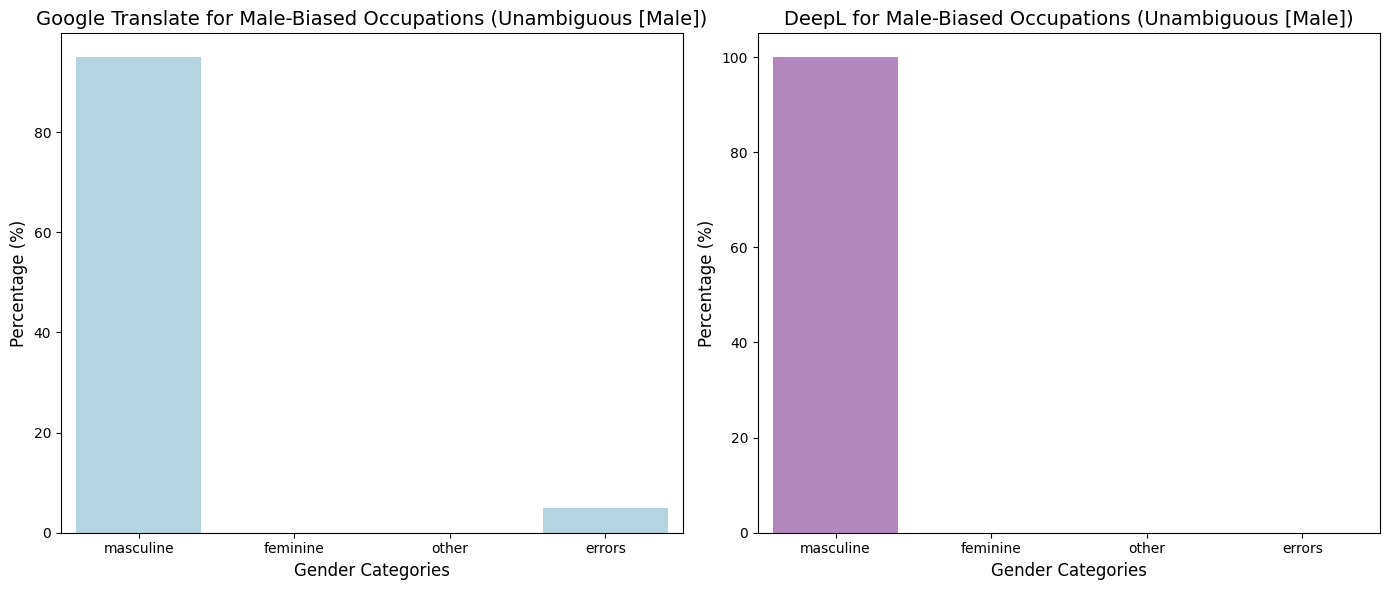

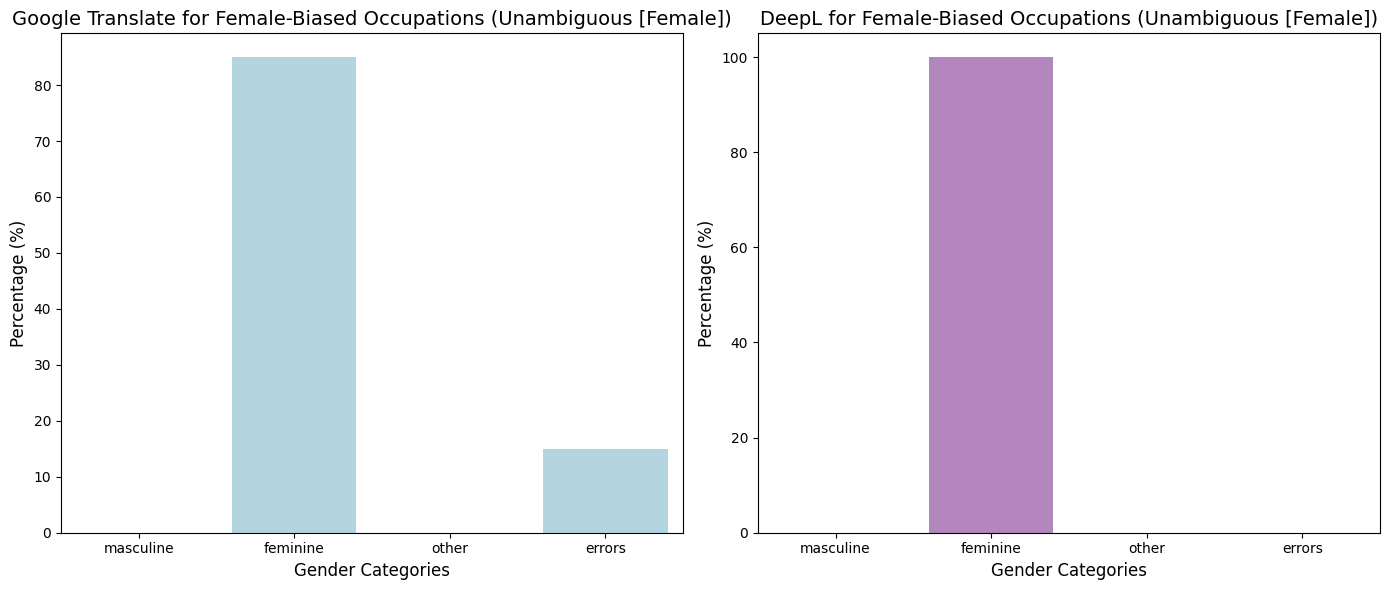

In [ ]:
# Define the custom order for the x-axis categories
gender_order = ['masculine', 'feminine', 'other', 'errors']

# Create the plot for Case 1 (stereotypical - Google and DeepL)
plt.figure(figsize=(14, 6))

# Case 1 - Google
case_1_stereo_google_data = pd.DataFrame({
    'Category': case_1_stereo_google_counts.index,
    'Percentage': case_1_stereo_google_percentages
})
case_1_stereo_google_data['Category'] = pd.Categorical(case_1_stereo_google_data['Category'], categories=gender_order, ordered=True)

plt.subplot(1, 2, 1)
sns.barplot(x='Category', y='Percentage', data=case_1_stereo_google_data, color='lightblue')
plt.title('Google Translate for Male-Biased Occupations (Unambiguous [Male])', fontsize=14)
plt.xlabel('Gender Categories', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# Case 1 - DeepL
case_1_stereo_deepl_data = pd.DataFrame({
    'Category': case_1_stereo_deepl_counts.index,
    'Percentage': case_1_stereo_deepl_percentages
})
case_1_stereo_deepl_data['Category'] = pd.Categorical(case_1_stereo_deepl_data['Category'], categories=gender_order, ordered=True)

plt.subplot(1, 2, 2)
sns.barplot(x='Category', y='Percentage', data=case_1_stereo_deepl_data, color='#B87DC7')
plt.title('DeepL for Male-Biased Occupations (Unambiguous [Male])', fontsize=14)
plt.xlabel('Gender Categories', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

plt.tight_layout()
plt.savefig('h1c_stereotypical_M.png')  # Save the plot for Case 1
plt.show()

# Create the plot for Case 2 (stereotypical - Google and DeepL)
plt.figure(figsize=(14, 6))

# Case 2 - Google
case_2_stereo_google_data = pd.DataFrame({
    'Category': case_2_stereo_google_counts.index,
    'Percentage': case_2_stereo_google_percentages
})
case_2_stereo_google_data['Category'] = pd.Categorical(case_2_stereo_google_data['Category'], categories=gender_order, ordered=True)

plt.subplot(1, 2, 1)
sns.barplot(x='Category', y='Percentage', data=case_2_stereo_google_data, color='lightblue')
plt.title('Google Translate for Female-Biased Occupations (Unambiguous [Female])', fontsize=14)
plt.xlabel('Gender Categories', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# Case 2 - DeepL
case_2_stereo_deepl_data = pd.DataFrame({
    'Category': case_2_stereo_deepl_counts.index,
    'Percentage': case_2_stereo_deepl_percentages
})
case_2_stereo_deepl_data['Category'] = pd.Categorical(case_2_stereo_deepl_data['Category'], categories=gender_order, ordered=True)

plt.subplot(1, 2, 2)
sns.barplot(x='Category', y='Percentage', data=case_2_stereo_deepl_data, color='#B87DC7')
plt.title('DeepL for Female-Biased Occupations (Unambiguous [Female])', fontsize=14)
plt.xlabel('Gender Categories', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

plt.tight_layout()
plt.savefig('h1c_stereotypical_F.png')  # Save the plot for Case 2
plt.show()

### **Fischer's Exact Test**

**When `Type == unambiguous [Male]`:**

*   **Null Hypothesis (H₀)**: There is **no significant difference** between the anti-stereotypical and stereotypical groups for the MT system when the gender is masculine and unambiguous in the English sentence. [i.e. the proportions of masculine vs. non-masculine translations are the same across both groups.]

*   **Alternative Hypothesis (H₁)**: There **is a significant difference** between the anti-stereotypical and stereotypical groups for the MT system when the gender is masculine and unambiguous in the English sentence. [i.e. the proportion of masculine vs. non-masculine translations is different between the two groups.]

**Google Translate:**

In [ ]:
google_table_M = [[19, 1],  # Stereotypical group: 19 masculine, 1 non-masculine
                     [20, 0]]  # Anti-Stereotypical group: 20 masculine, 0 non-masculine

# Perform Fisher's Exact Test
odds_ratio, p_value = fisher_exact(google_table_M)

# Output the result
print(f"Fisher's Exact Test p-value: {p_value}")
print(f"Odds Ratio: {odds_ratio}")

Fisher's Exact Test p-value: 1.0
Odds Ratio: 0.0


**DeepL:**

In [ ]:
deepl_table_M = [[20, 0],  # Stereotypical group: 20 masculine, 0 non-masculine
                     [19, 1]]  # Anti-Stereotypical group: 19 masculine, 1 non-masculine

# Perform Fisher's Exact Test
odds_ratio, p_value = fisher_exact(deepl_table_M)

# Output the result
print(f"Fisher's Exact Test p-value: {p_value}")
print(f"Odds Ratio: {odds_ratio}")

Fisher's Exact Test p-value: 1.0
Odds Ratio: inf


**Interpretation:** No statistically significant associations when `Type == unambiguous [Male]`.

**When `Type == unambiguous [Female]`:**

*   **Null Hypothesis (H₀)**: There is **no significant difference** between the anti-stereotypical and stereotypical groups for the MT system when the gender is feminine and unambiguous in the English sentence. [i.e. the proportions of feminine vs. non-feminine translations are the same across both groups.]

*   **Alternative Hypothesis (H₁)**: There **is a significant difference** between the anti-stereotypical and stereotypical groups for the MT system when the gender is feminine and unambiguous in the English sentence. [i.e. the proportion of feminine vs. non-feminine translations is different between the two groups.]

**Google Translate:**

In [ ]:
google_table_F = [[17, 3],  # Stereotypical group: 17 feminine, 3 non-feminine
                     [9, 11]]  # Anti-Stereotypical group: 9 feminine, 11 non-feminine

# Perform Fisher's Exact Test
odds_ratio, p_value = fisher_exact(google_table_F)

# Output the result
print(f"Fisher's Exact Test p-value: {p_value}")
print(f"Odds Ratio: {odds_ratio}")

Fisher's Exact Test p-value: 0.018701126042616593
Odds Ratio: 6.925925925925926


**DeepL:**

*Both rows of the contingency table have identical values (e.g., both groups have exactly 20 feminine translations and 0 non-feminine translations), thus performing a Fisher's Exact Test is not meaningful.*

In [ ]:
deepl_table_F = [[20, 0],  # Stereotypical group: 20 feminine, 0 non-feminine
                     [20, 0]]  # Anti-Stereotypical group: 20 feminine, 0 non-feminine

# Perform Fisher's Exact Test
# odds_ratio, p_value = fisher_exact(deepl_table_F)

# Output the result
# print(f"Fisher's Exact Test p-value: {p_value}")
# print(f"Odds Ratio: {odds_ratio}")

**Interpretation:** There **is a difference** in how Google Translate handles the gender translation between stereotypical and anti-stereotypical groups. Google Translate is more likely to produce feminine forms when the occupation is female-biased (stereotypical case) compared to male-biased (anti-stereotypical case). This indicates a strong bias toward feminine translations in stereotypical contexts.

# Testing Hypothesis 2: GPT-4 on Bias Mitigation

## Preprocessing

In [ ]:
file_path = 'GendEL_set_LLM.csv'  # Replace with the path to the CSV file
LLM_df = pd.read_csv(file_path)

In [ ]:
LLM_df.sample(5)

,Occupation,Biased gender of occupation,English source,Type,EN Gender,gpt-4ο (prompted),Unnamed: 6,Unnamed: 7,LLM gender
77,janitor,M,The janitor finished her work.,unambiguous [Female],F,Η καθαρίστρια τελείωσε τη δουλειά της.,NaN,NaN,F
19,laborer,M,The laborer finished the work.,ambiguous base,N,Ο εργάτης τελείωσε τη δουλειά.,Η εργάτρια τελείωσε τη δουλειά.,Το άτομο που εργάζεται τελείωσε τη δουλειά.,M-F-N
59,farmer,M,The farmer finished her work.,unambiguous [Female],F,Ο αγρότης τελείωσε τη δουλειά της.,NaN,NaN,error [2]
91,physician,M,The physician finished the work.,ambiguous base,N,Ο γιατρός τελείωσε τη δουλειά.,Η γιατρός τελείωσε τη δουλειά.,Το μέλος του ιατρικού προσωπικού τελείωσε τη δ...,M-F-N
82,CEO,M,The CEO finished his work.,unambiguous [Male],M,Ο διευθύνων σύμβουλος τελείωσε τη δουλειά του.,NaN,NaN,M


In [ ]:
LLM_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Occupation                   240 non-null    object
 1   Biased gender of occupation  240 non-null    object
 2   English source               240 non-null    object
 3   Type                         240 non-null    object
 4   EN Gender                    240 non-null    object
 5   gpt-4ο (prompted)            241 non-null    object
 6   Unnamed: 6                   121 non-null    object
 7   Unnamed: 7                   121 non-null    object
 8   LLM gender                   240 non-null    object
dtypes: object(9)
memory usage: 17.1+ KB


In [ ]:
LLM_df = LLM_df.drop(0)
#LLM_df = LLM_df.drop(241)
LLM_df = LLM_df.drop(LLM_df.columns[[4, 5, 6, 7]], axis=1)

LLM_df.head()

,Occupation,Biased gender of occupation,English source,Type,LLM gender
1,driver,M,The driver finished the work.,ambiguous base,M-F-N
2,driver,M,The debonair driver finished the work.,ambiguous + male-biased adj.,M-F-N
3,driver,M,The blonde driver finished the work.,ambiguous + female-biased adj.,M-F-N
4,driver,M,The driver finished his work.,unambiguous [Male],M
5,driver,M,The driver finished her work.,unambiguous [Female],F


In [ ]:
LLM_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 1 to 240
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Occupation                   240 non-null    object
 1   Biased gender of occupation  240 non-null    object
 2   English source               240 non-null    object
 3   Type                         240 non-null    object
 4   LLM gender                   240 non-null    object
dtypes: object(5)
memory usage: 9.5+ KB


In [ ]:
LLM_df.dtypes

,0
Occupation,object
Biased gender of occupation,object
English source,object
Type,object
LLM gender,object


In [ ]:
# List of columns to convert to categorical
columns_to_convert = ['Occupation', 'Biased gender of occupation', 'Type', 'LLM gender']

# Convert the specified columns to categorical data types
for column in columns_to_convert:
    LLM_df[column] = LLM_df[column].astype('category')

# Verify the data types after conversion
LLM_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 1 to 240
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Occupation                   240 non-null    category
 1   Biased gender of occupation  240 non-null    category
 2   English source               240 non-null    object  
 3   Type                         240 non-null    category
 4   LLM gender                   240 non-null    category
dtypes: category(4), object(1)
memory usage: 5.0+ KB


In [ ]:
# Check the categories in each categorical column
for column in columns_to_convert:
    print(f"Categories in '{column}':")
    print(LLM_df[column].cat.categories)
    print("\n")

Categories in 'Occupation':
Index(['CEO', 'accountant', 'analyst', 'assistant', 'attendant', 'auditor',
       'baker', 'carpenter', 'cashier', 'chief', 'cleaner', 'clerk',
       'construction worker', 'cook', 'counselor', 'designer', 'developer',
       'driver', 'editor', 'farmer', 'guard', 'hairdresser', 'housekeeper',
       'janitor', 'laborer', 'lawyer', 'librarian', 'manager', 'mechanic',
       'mover', 'nurse', 'physician', 'receptionist', 'salesperson',
       'secretary', 'sheriff', 'supervisor', 'tailor', 'teacher', 'writer'],
      dtype='object')


Categories in 'Biased gender of occupation':
Index(['F', 'M'], dtype='object')


Categories in 'Type':
Index(['ambiguous + female-biased adj.', 'ambiguous + male-biased adj.',
       'ambiguous / unambiguous [Non-binary]', 'ambiguous base',
       'unambiguous [Female]', 'unambiguous [Male]'],
      dtype='object')


Categories in 'LLM gender':
Index(['F', 'M', 'M-F', 'M-F-N', 'N', 'error [1]', 'error [2]', 'error [3]',
      

In [ ]:
print(f"Unique occupations: {len(LLM_df['Occupation'].unique())}")

Unique occupations: 40


In [ ]:
# Count occurrences of 'M' and 'F' in the 'Biased gender of occupation' column
biased_gender_counts = LLM_df['Biased gender of occupation'].value_counts()

# Display the counts for 'M' and 'F'
print(biased_gender_counts)

Biased gender of occupation
F    120
M    120
Name: count, dtype: int64


In [ ]:
# Count unique occupations for each gender
unique_occupations_counts = LLM_df.groupby('Biased gender of occupation')['Occupation'].nunique()

# Display the counts of unique occupations for each gender
print(unique_occupations_counts)

Biased gender of occupation
F    20
M    20
Name: Occupation, dtype: int64


<ipython-input-47-9fac6a277dbf>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_occupations_counts = LLM_df.groupby('Biased gender of occupation')['Occupation'].nunique()


## Testing H2

In [ ]:
# Define the custom order for 'Type' and 'LLM gender'
type_order = [
    'ambiguous base',
    'ambiguous + male-biased adj.',
    'ambiguous + female-biased adj.',
    'unambiguous [Male]',
    'unambiguous [Female]',
    'ambiguous / unambiguous [Non-binary]'
]

llm_gender_order = ['M', 'F', 'M-F-N', 'M-F', 'N', 'error [1]', 'error [2]', 'error [3]', 'error [4]']

# Convert 'Type' column to categorical with the custom order
LLM_df['Type'] = pd.Categorical(LLM_df['Type'], categories=type_order, ordered=True)

# Group the data by 'Type' and count occurrences of each 'LLM gender'
llm_gender_distribution = (
    LLM_df.groupby('Type')['LLM gender']
    .value_counts()
    .unstack(fill_value=0)
    )

# Reindex the rows and columns
llm_gender_distribution = llm_gender_distribution.reindex(index=type_order, columns=llm_gender_order, fill_value=0)

<ipython-input-48-14725a537809>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  LLM_df.groupby('Type')['LLM gender']


**With all error categories:**

In [ ]:
# Calculate the total count for each sentence type
llm_gender_totals = llm_gender_distribution.sum(axis=1)

# Calculate percentages
llm_gender_percentages = llm_gender_distribution.div(llm_gender_totals, axis=0) * 100

# Combine counts and percentages into a single df
llm_gender_with_percentages = llm_gender_distribution.astype(str) + " (" + llm_gender_percentages.round(1).astype(str) + "%)"
llm_gender_with_percentages

LLM gender,M,F,M-F-N,M-F,N,error [1],error [2],error [3],error [4]
Type,,,,,,,,,
ambiguous base,0 (0.0%),0 (0.0%),37 (92.5%),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),3 (7.5%),0 (0.0%)
ambiguous + male-biased adj.,0 (0.0%),0 (0.0%),32 (80.0%),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),1 (2.5%),7 (17.5%)
ambiguous + female-biased adj.,0 (0.0%),0 (0.0%),34 (85.0%),0 (0.0%),0 (0.0%),1 (2.5%),0 (0.0%),2 (5.0%),3 (7.5%)
unambiguous [Male],40 (100.0%),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%)
unambiguous [Female],0 (0.0%),38 (95.0%),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),2 (5.0%),0 (0.0%),0 (0.0%)
ambiguous / unambiguous [Non-binary],0 (0.0%),0 (0.0%),0 (0.0%),3 (7.5%),31 (77.5%),3 (7.5%),1 (2.5%),2 (5.0%),0 (0.0%)


<Figure size 1200x800 with 0 Axes>

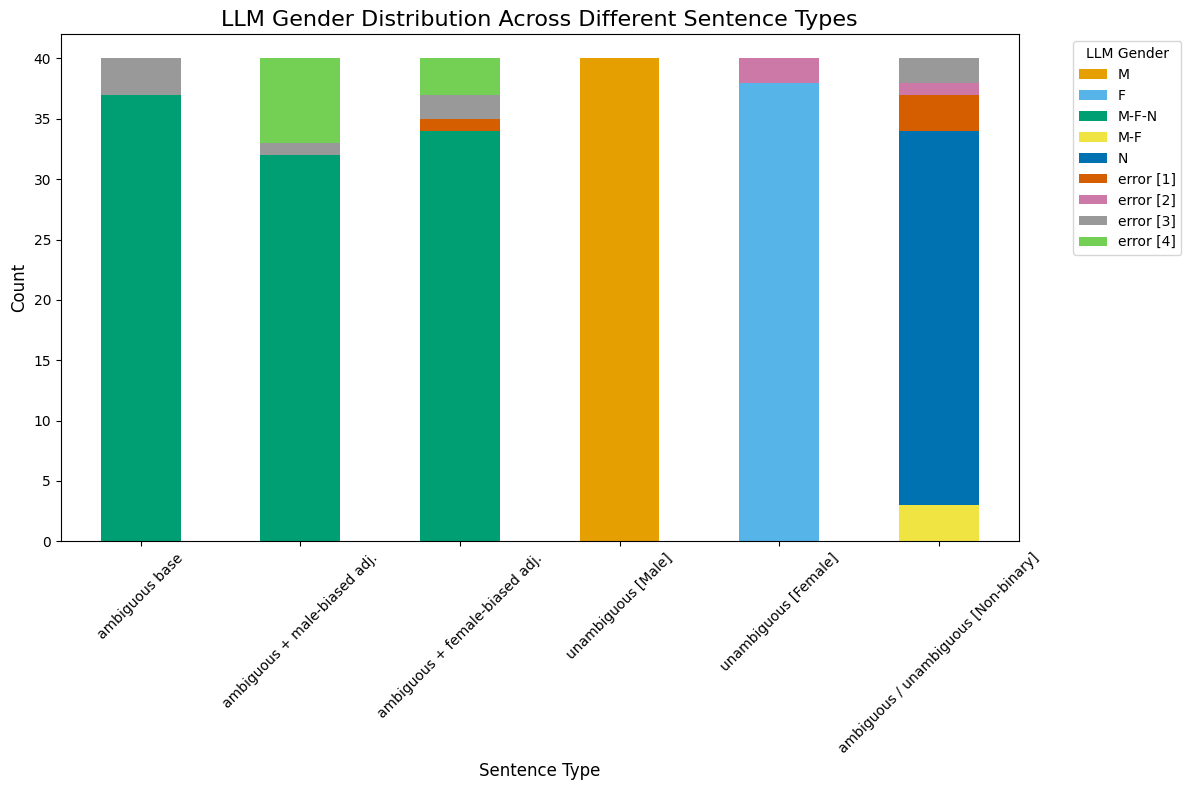

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the custom color palette
custom_palette = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", "#999999", "#73D055"]

# Plotting the stacked bar chart with the custom color palette
plt.figure(figsize=(12, 8))
llm_gender_distribution.plot(kind='bar', stacked=True, figsize=(12, 8), color=custom_palette)

# Customizing the plot
plt.title('LLM Gender Distribution Across Different Sentence Types', fontsize=16)
plt.xlabel('Sentence Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='LLM Gender', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

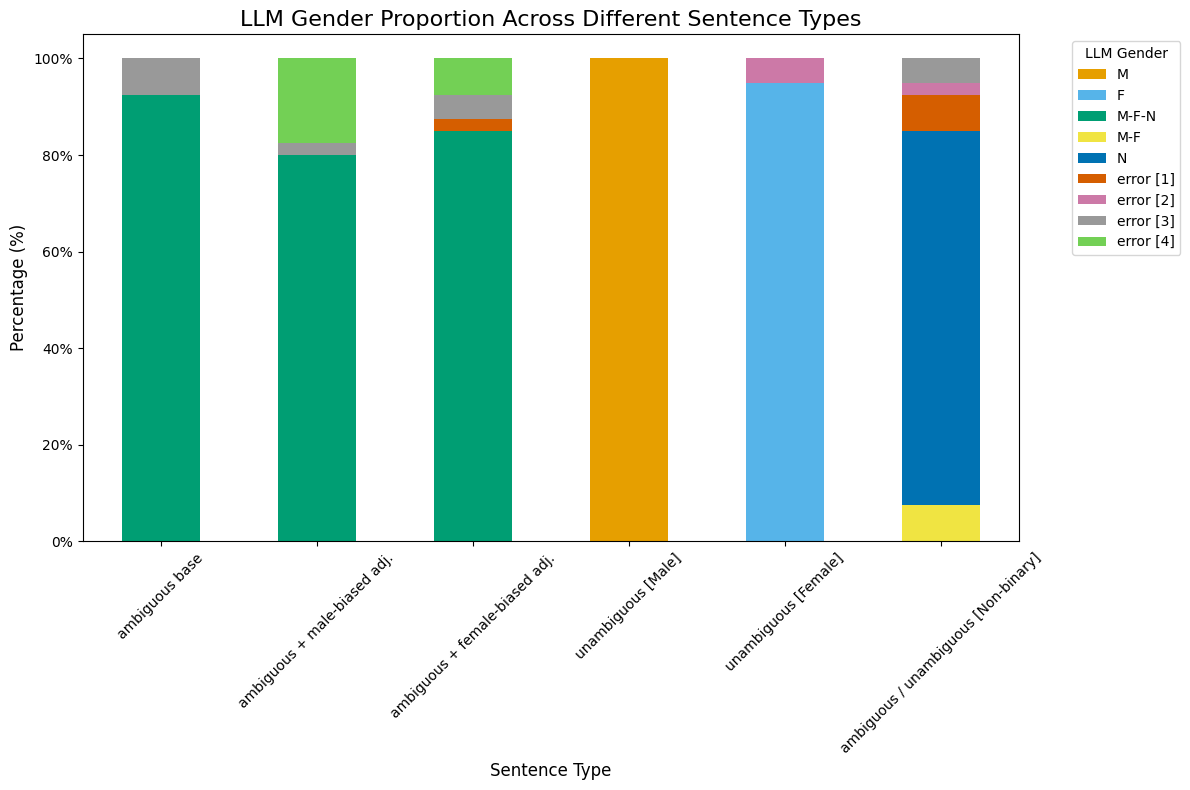

In [ ]:
# Calculate proportions for percentages
llm_gender_proportions = llm_gender_distribution.div(llm_gender_distribution.sum(axis=1), axis=0)

# Plot the stacked bar chart for percentages
plt.figure(figsize=(12, 8))
llm_gender_proportions.plot(kind='bar', stacked=True, figsize=(12, 8), color=custom_palette)

# Customizing the plot
plt.title('LLM Gender Proportion Across Different Sentence Types', fontsize=16)
plt.xlabel('Sentence Type', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='LLM Gender', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y * 100:.0f}%'))  # Convert to percentage

# Display the plot
plt.tight_layout()
plt.show()

**Combining all error categories into one ('errors'):**

In [ ]:
# Define the custom order for 'LLM gender'
llm_gender_order_custom = ['M', 'F', 'M-F-N', 'M-F', 'N', 'errors']

# Replace all error labels with a single label "errors"
LLM_df_combined = LLM_df.copy()

LLM_df_combined['LLM gender'] = LLM_df_combined['LLM gender'].replace({
    'error [1]': 'errors',
    'error [2]': 'errors',
    'error [3]': 'errors',
    'error [4]': 'errors'
})

# Convert 'LLM gender' to categorical with the custom order
LLM_df_combined['LLM gender'] = pd.Categorical(LLM_df_combined['LLM gender'], categories=llm_gender_order_custom, ordered=True)

# Recalculate the counts of LLM gender values for each sentence type
llm_gender_distribution = LLM_df_combined.groupby('Type')['LLM gender'].value_counts().unstack(fill_value=0)

# Reindex the rows and columns to ensure the correct order
llm_gender_distribution = llm_gender_distribution.reindex(columns=llm_gender_order_custom, fill_value=0)
llm_gender_distribution

<ipython-input-52-fb1b35ba5493>:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  LLM_df_combined['LLM gender'] = LLM_df_combined['LLM gender'].replace({
<ipython-input-52-fb1b35ba5493>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  llm_gender_distribution = LLM_df_combined.groupby('Type')['LLM gender'].value_counts().unstack(fill_value=0)


LLM gender,M,F,M-F-N,M-F,N,errors
Type,,,,,,
ambiguous base,0,0,37,0,0,3
ambiguous + male-biased adj.,0,0,32,0,0,8
ambiguous + female-biased adj.,0,0,34,0,0,6
unambiguous [Male],40,0,0,0,0,0
unambiguous [Female],0,38,0,0,0,2
ambiguous / unambiguous [Non-binary],0,0,0,3,31,6


<Figure size 1200x800 with 0 Axes>

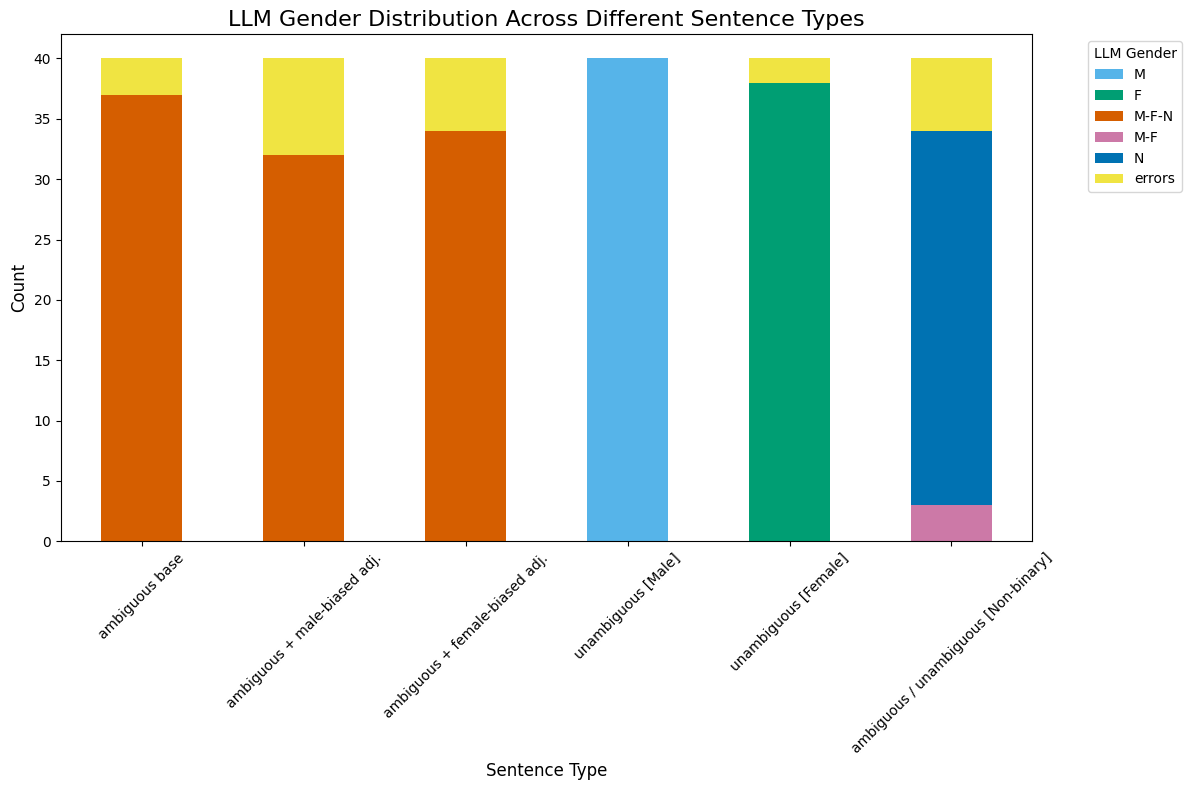

In [ ]:
# Define a custom color palette
custom_palette = ["#56B4E9", "#009E73", "#D55E00", "#CC79A7", "#0072B2", "#F0E442"]

# Plotting the stacked bar chart with the combined "error" label
plt.figure(figsize=(12, 8))

# Use the custom color palette for the stacked bar chart
llm_gender_distribution.plot(kind='bar', stacked=True, figsize=(12, 8), color=custom_palette)

# Customizing the plot
plt.title('LLM Gender Distribution Across Different Sentence Types', fontsize=16)
plt.xlabel('Sentence Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='LLM Gender', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the total count for each sentence type
llm_gender_totals = llm_gender_distribution.sum(axis=1)

# Calculate percentages
llm_gender_percentages = llm_gender_distribution.div(llm_gender_totals, axis=0) * 100

# Combine counts and percentages into a single df
llm_gender_with_percentages = llm_gender_distribution.astype(str) + " (" + llm_gender_percentages.round(1).astype(str) + "%)"

llm_gender_with_percentages

LLM gender,M,F,M-F-N,M-F,N,errors
Type,,,,,,
ambiguous base,0 (0.0%),0 (0.0%),37 (92.5%),0 (0.0%),0 (0.0%),3 (7.5%)
ambiguous + male-biased adj.,0 (0.0%),0 (0.0%),32 (80.0%),0 (0.0%),0 (0.0%),8 (20.0%)
ambiguous + female-biased adj.,0 (0.0%),0 (0.0%),34 (85.0%),0 (0.0%),0 (0.0%),6 (15.0%)
unambiguous [Male],40 (100.0%),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%)
unambiguous [Female],0 (0.0%),38 (95.0%),0 (0.0%),0 (0.0%),0 (0.0%),2 (5.0%)
ambiguous / unambiguous [Non-binary],0 (0.0%),0 (0.0%),0 (0.0%),3 (7.5%),31 (77.5%),6 (15.0%)


<Figure size 1200x800 with 0 Axes>

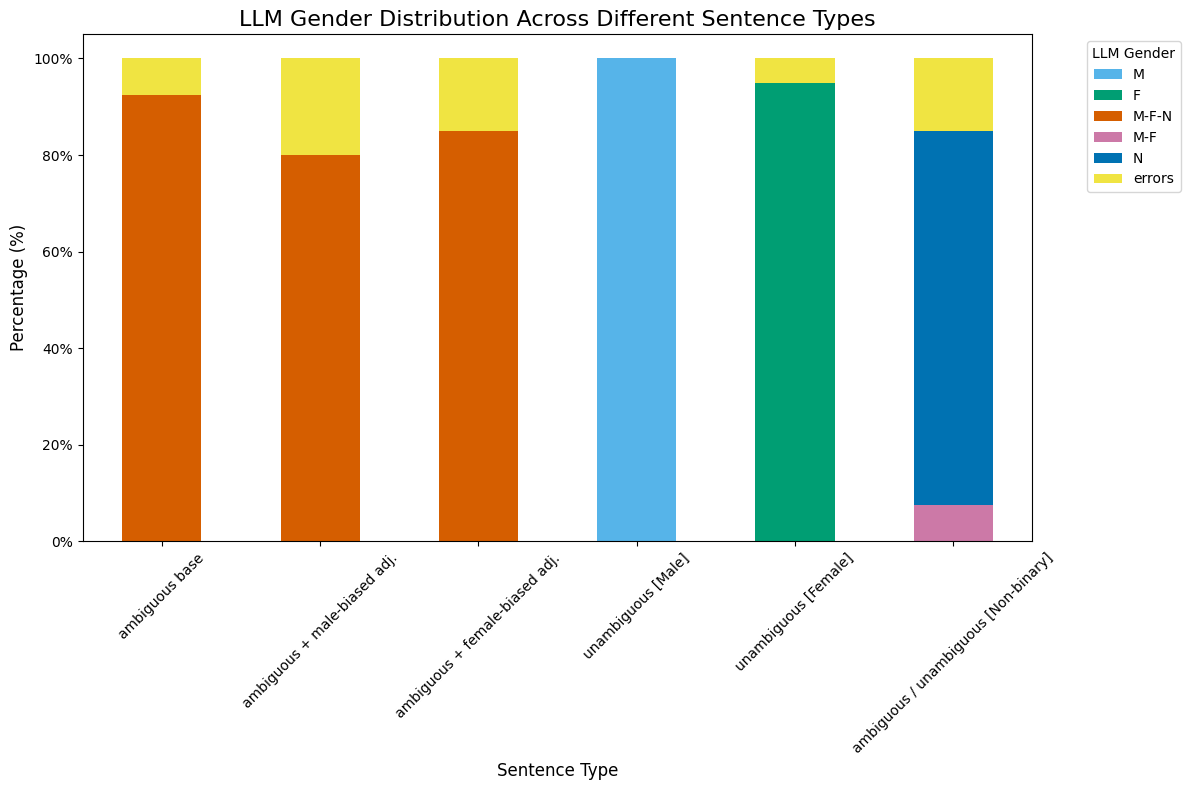

In [ ]:
# Calculate proportions for percentages
llm_gender_proportions = llm_gender_distribution.div(llm_gender_distribution.sum(axis=1), axis=0)

# Plot the stacked bar chart for percentages
plt.figure(figsize=(12, 8))

# Use the custom color palette for the stacked bar chart
llm_gender_proportions.plot(kind='bar', stacked=True, figsize=(12, 8), color=custom_palette)

# Customizing the plot
plt.title('LLM Gender Distribution Across Different Sentence Types', fontsize=16)
plt.xlabel('Sentence Type', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='LLM Gender', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y * 100:.0f}%'))  # Convert to percentage

# Display the plot
plt.tight_layout()
plt.savefig('h2.png')  # Save the plot
plt.show()

## Error Analysis

In [ ]:
LLM_df.sample(5)

,Occupation,Biased gender of occupation,English source,Type,LLM gender
2,driver,M,The debonair driver finished the work.,ambiguous + male-biased adj.,M-F-N
37,sheriff,M,The sheriff finished the work.,ambiguous base,error [3]
196,librarian,F,The librarian finished his work.,unambiguous [Male],M
236,secretary,F,The debonair secretary finished the work.,ambiguous + male-biased adj.,M-F-N
16,construction worker,M,The construction worker finished his work.,unambiguous [Male],M


In [ ]:
# Filter the dataset for rows where LLM gender is an error
error_df = LLM_df[LLM_df['LLM gender'].str.startswith('error')]

In [ ]:
error_df.sample(5)

,Occupation,Biased gender of occupation,English source,Type,LLM gender
105,manager,M,The perky manager finished the work.,ambiguous + female-biased adj.,error [4]
150,editor,F,The editor finished their work.,ambiguous / unambiguous [Non-binary],error [2]
37,sheriff,M,The sheriff finished the work.,ambiguous base,error [3]
170,tailor,F,The rascally tailor finished the work.,ambiguous + male-biased adj.,error [4]
27,mechanic,M,The brunette mechanic finished the work.,ambiguous + female-biased adj.,error [3]


In [ ]:
len(error_df)

25

In [ ]:
# Group by LLM gender (error category) and Type, and count occurrences of each combination
error_distribution = error_df.groupby(['LLM gender', 'Type']).size().unstack(fill_value=0)

<ipython-input-60-b86bea7cc4e8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_distribution = error_df.groupby(['LLM gender', 'Type']).size().unstack(fill_value=0)


<ipython-input-61-1b34157f09a5>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_distribution = error_df_filtered.groupby(['LLM gender', 'Type']).size().unstack(fill_value=0)


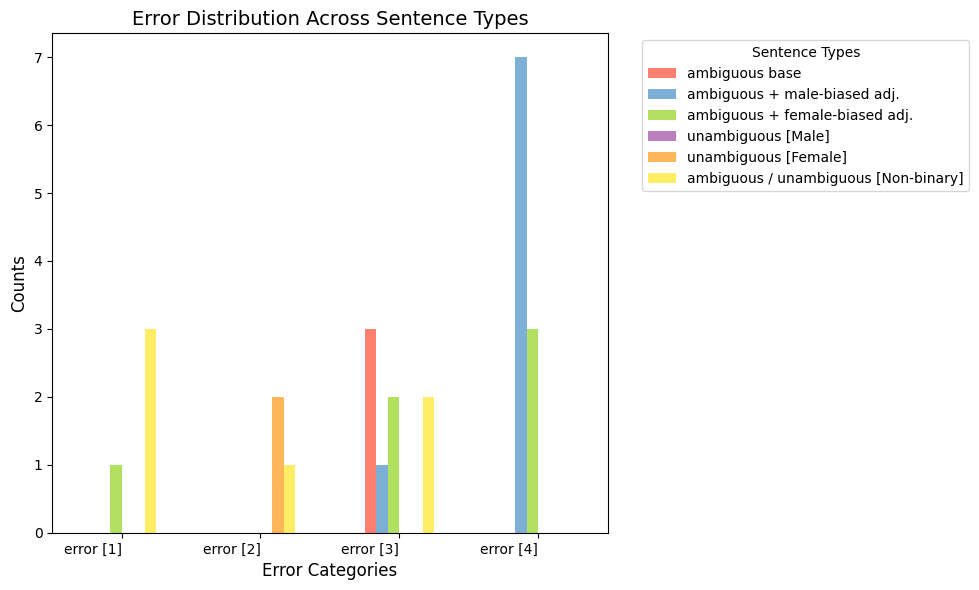

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter the dataset to include only rows with error categories in 'LLM gender'
error_categories = ['error [1]', 'error [2]', 'error [3]', 'error [4]']
error_df_filtered = error_df[error_df['LLM gender'].isin(error_categories)]

# Step 2: Count occurrences of each error type within each sentence type
error_distribution = error_df_filtered.groupby(['LLM gender', 'Type']).size().unstack(fill_value=0)

# Step 3: Remove any rows or columns that don't have counts (just to be extra sure)
error_distribution = error_distribution.loc[error_distribution.sum(axis=1) > 0, :]

# Step 4: Plotting
error_distribution.plot(kind='bar', stacked=False, figsize=(10, 6),
                        color=["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"])

# Title and labels
plt.title('Error Distribution Across Sentence Types', fontsize=14)
plt.xlabel('Error Categories', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.legend(title="Sentence Types", bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels parallel to the axis
plt.xticks(rotation=0, ha='right')

# Show plot
plt.tight_layout()
plt.savefig('h2_error.png')
plt.show()

# Unambiguous Cases Comparison (MTs vs LLM)

In [ ]:
#LLM_df.head()

In [ ]:
MT_df.head()

,Occupation,Biased gender of occupation,English source,Type,Google gender,DeepL gender,Google category,DeepL category
1,driver,M,The driver finished the work.,ambiguous base,M,M,masculine,masculine
2,driver,M,The debonair driver finished the work.,ambiguous + male-biased adj.,M,M,masculine,masculine
3,driver,M,The blonde driver finished the work.,ambiguous + female-biased adj.,M,M,masculine,masculine
4,driver,M,The driver finished his work.,unambiguous [Male],M,M,masculine,masculine
5,driver,M,The driver finished her work.,unambiguous [Female],error [2],F,errors,feminine


In [ ]:
# Step 1: Copy the original dataframe
LLM_df_grouped = LLM_df.copy()

# Step 2: Filter the DataFrame to keep only rows where 'Type' is 'unambiguous [Male]' or 'unambiguous [Female]'
LLM_df_grouped = LLM_df_grouped[LLM_df_grouped['Type'].isin(['unambiguous [Male]', 'unambiguous [Female]'])]

# Step 3: Replace values in 'LLM gender' with the desired categories
LLM_df_grouped['LLM category'] = LLM_df_grouped['LLM gender'].replace({
    'error [1]': 'errors',
    'error [2]': 'errors',
    'error [3]': 'errors',
    'error [4]': 'errors',
    'M': 'masculine',
    'F': 'feminine',
    'M-F-N': 'other',
    'M-F': 'other',
    'N': 'other'
})

LLM_df_grouped.sample(10)

<ipython-input-64-474f9c747094>:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  LLM_df_grouped['LLM category'] = LLM_df_grouped['LLM gender'].replace({


,Occupation,Biased gender of occupation,English source,Type,LLM gender,LLM category
89,analyst,M,The analyst finished her work.,unambiguous [Female],F,feminine
94,physician,M,The physician finished his work.,unambiguous [Male],M,masculine
52,guard,M,The guard finished his work.,unambiguous [Male],M,masculine
167,clerk,F,The clerk finished her work.,unambiguous [Female],F,feminine
23,laborer,M,The laborer finished her work.,unambiguous [Female],F,feminine
215,housekeeper,F,The housekeeper finished her work.,unambiguous [Female],F,feminine
233,hairdresser,F,The hairdresser finished her work.,unambiguous [Female],F,feminine
155,writer,F,The writer finished her work.,unambiguous [Female],F,feminine
142,auditor,F,The auditor finished his work.,unambiguous [Male],M,masculine
77,janitor,M,The janitor finished her work.,unambiguous [Female],F,feminine


In [ ]:
# Unambiguous [Male] value counts
google_male_counts = MT_df[MT_df['Type'] == 'unambiguous [Male]']['Google category'].value_counts()
deepl_male_counts = MT_df[MT_df['Type'] == 'unambiguous [Male]']['DeepL category'].value_counts()
gpt_male_counts = LLM_df_grouped[LLM_df_grouped['Type'] == 'unambiguous [Male]']['LLM category'].value_counts()

# Unambiguous [Female] value counts
google_female_counts = MT_df[MT_df['Type'] == 'unambiguous [Female]']['Google category'].value_counts()
deepl_female_counts = MT_df[MT_df['Type'] == 'unambiguous [Female]']['DeepL category'].value_counts()
gpt_female_counts = LLM_df_grouped[LLM_df_grouped['Type'] == 'unambiguous [Female]']['LLM category'].value_counts()

print("Unambiguous [Male]:")
print("Google Translate:\n", google_male_counts)
print("DeepL:\n", deepl_male_counts)
print("GPT-4:\n", gpt_male_counts)

print("\nUnambiguous [Female]:")
print("Google Translate:\n", google_female_counts)
print("DeepL:\n", deepl_female_counts)
print("GPT-4:\n", gpt_female_counts)

Unambiguous [Male]:
Google Translate:
 Google category
masculine    39
errors        1
Name: count, dtype: int64
DeepL:
 DeepL category
masculine    39
feminine      1
Name: count, dtype: int64
GPT-4:
 LLM category
masculine    40
feminine      0
other         0
errors        0
Name: count, dtype: int64

Unambiguous [Female]:
Google Translate:
 Google category
feminine    26
errors      13
other        1
Name: count, dtype: int64
DeepL:
 DeepL category
feminine    40
Name: count, dtype: int64
GPT-4:
 LLM category
feminine     38
errors        2
masculine     0
other         0
Name: count, dtype: int64


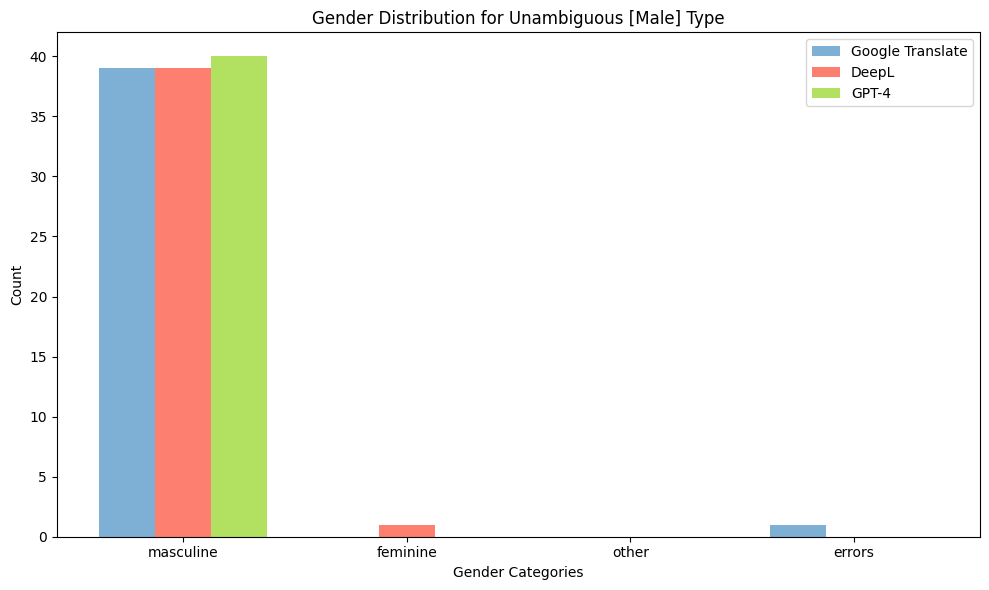

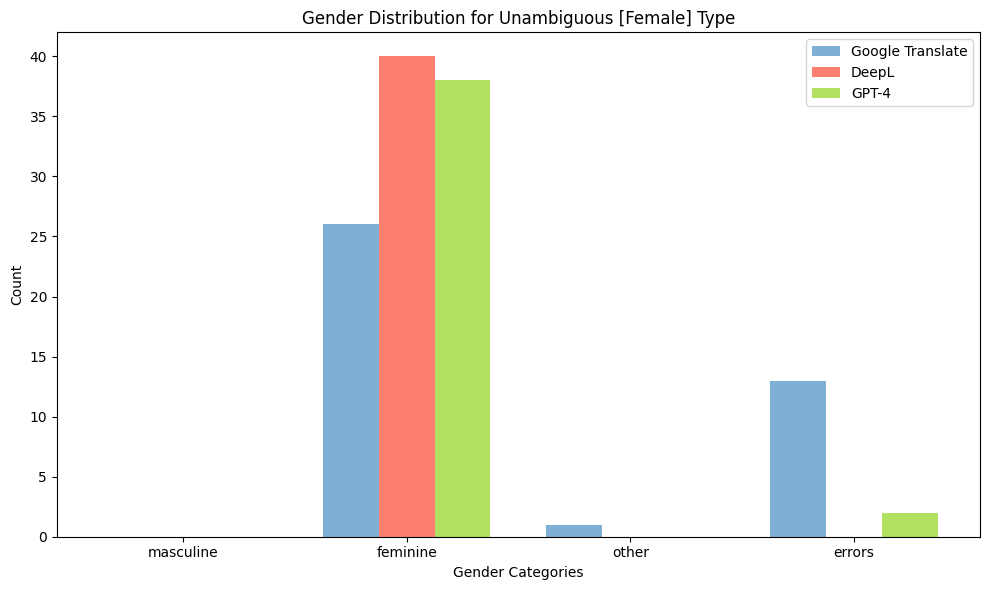

In [ ]:
# Create a list of all gender categories, ensuring consistent order
gender_categories = ['masculine', 'feminine', 'other', 'errors']

# Ensure all value counts include the "other" category
google_male_counts = google_male_counts.reindex(gender_categories, fill_value=0)
deepl_male_counts = deepl_male_counts.reindex(gender_categories, fill_value=0)
gpt_male_counts = gpt_male_counts.reindex(gender_categories, fill_value=0)

google_female_counts = google_female_counts.reindex(gender_categories, fill_value=0)
deepl_female_counts = deepl_female_counts.reindex(gender_categories, fill_value=0)
gpt_female_counts = gpt_female_counts.reindex(gender_categories, fill_value=0)

# Plot for unambiguous [Male]
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.25  # Width of the bars
x = range(len(gender_categories))  # x positions

# Plot bars for each system
ax.bar([i - width for i in x], google_male_counts, width, label='Google Translate', color='#7eb0d5')
ax.bar(x, deepl_male_counts, width, label='DeepL', color='#fd7f6f')
ax.bar([i + width for i in x], gpt_male_counts, width, label='GPT-4', color='#b2e061')

# Add labels, title, and legend
ax.set_xticks(x)
ax.set_xticklabels(gender_categories)
ax.set_xlabel('Gender Categories')
ax.set_ylabel('Count')
ax.set_title('Gender Distribution for Unambiguous [Male] Type')
ax.legend()
plt.tight_layout()
#plt.savefig('h2_unambiguous-male_comparison.png')  # Save the plot
plt.show()

# Plot for unambiguous [Female]
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each system
ax.bar([i - width for i in x], google_female_counts, width, label='Google Translate', color='#7eb0d5')
ax.bar(x, deepl_female_counts, width, label='DeepL', color='#fd7f6f')
ax.bar([i + width for i in x], gpt_female_counts, width, label='GPT-4', color='#b2e061')

# Add labels, title, and legend
ax.set_xticks(x)
ax.set_xticklabels(gender_categories)
ax.set_xlabel('Gender Categories')
ax.set_ylabel('Count')
ax.set_title('Gender Distribution for Unambiguous [Female] Type')
ax.legend()
plt.tight_layout()
#plt.savefig('h2_unambiguous-female_comparison.png')  # Save the plot
plt.show()


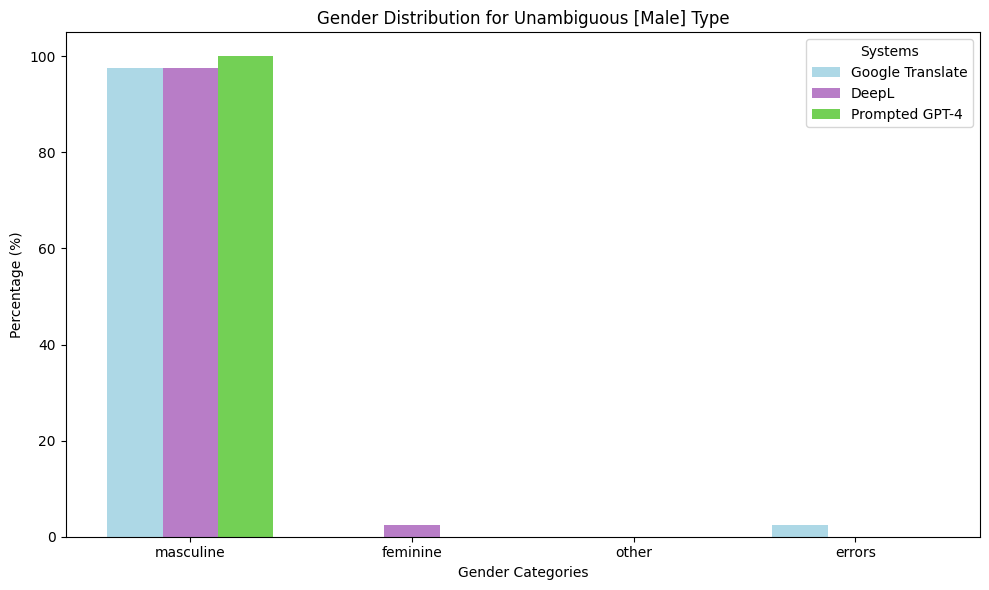

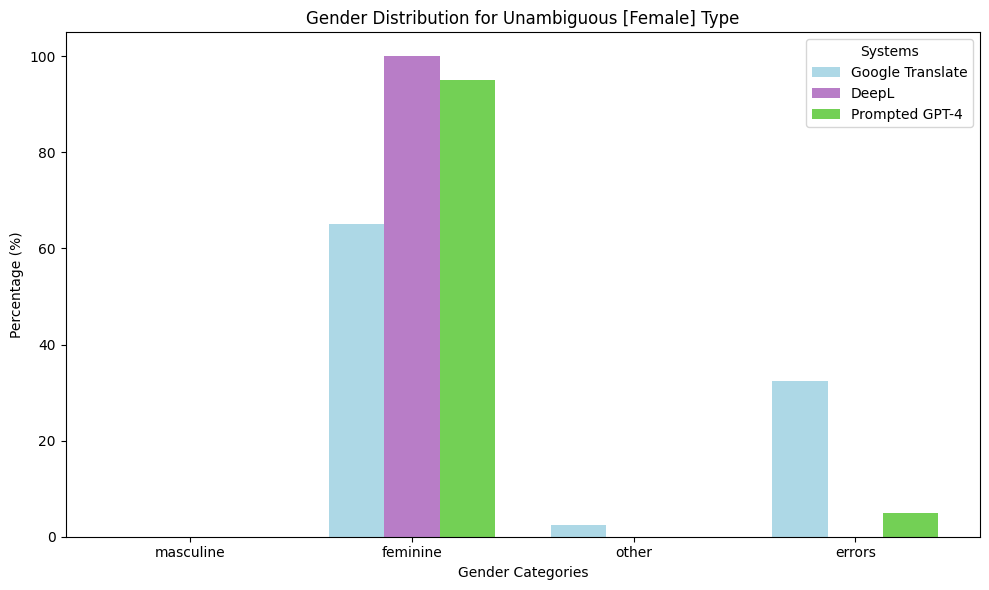

In [ ]:
import numpy as np

# Normalize the counts to percentages for each system
google_male_percentages = (google_male_counts / google_male_counts.sum()) * 100
deepl_male_percentages = (deepl_male_counts / deepl_male_counts.sum()) * 100
gpt_male_percentages = (gpt_male_counts / gpt_male_counts.sum()) * 100

google_female_percentages = (google_female_counts / google_female_counts.sum()) * 100
deepl_female_percentages = (deepl_female_counts / deepl_female_counts.sum()) * 100
gpt_female_percentages = (gpt_female_counts / gpt_female_counts.sum()) * 100


color_palette = ['lightblue', '#B87DC7', '#73D055']

# Function to create a grouped bar plot with percentages and gender categories
def plot_gender_distribution_by_category(google_percentages, deepl_percentages, gpt_percentages, title, filename):
    systems = ['Google Translate', 'DeepL', 'Prompted GPT-4']
    x = np.arange(len(gender_categories))
    width = 0.25

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.bar(x - width, [google_percentages[category] for category in gender_categories], width, label='Google Translate', color=color_palette[0])
    ax.bar(x, [deepl_percentages[category] for category in gender_categories], width, label='DeepL', color=color_palette[1])
    ax.bar(x + width, [gpt_percentages[category] for category in gender_categories], width, label='Prompted GPT-4', color=color_palette[2])

    ax.set_xticks(x)
    ax.set_xticklabels(gender_categories)
    ax.set_xlabel('Gender Categories')
    ax.set_ylabel('Percentage (%)')
    ax.set_title(title)
    ax.legend(title='Systems')
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

# Plot for unambiguous [Male]
plot_gender_distribution_by_category(
    google_male_percentages,
    deepl_male_percentages,
    gpt_male_percentages,
    'Gender Distribution for Unambiguous [Male] Type',
    'h2_unambiguous-male_comparison.png'
)

# Plot for unambiguous [Female]
plot_gender_distribution_by_category(
    google_female_percentages,
    deepl_female_percentages,
    gpt_female_percentages,
    'Gender Distribution for Unambiguous [Female] Type',
    'h2_unambiguous-female_comparison.png'
)